**Pregunta 3**

In [0]:
import keras

/home/difroggy/anaconda3/envs/redesneuronales/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


Parte a)

In [0]:
from keras.datasets import mnist
import numpy as np
from keras.utils import to_categorical
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.astype('float32') / 255. #and x_test
x_test=x_test.astype('float32')/255
Y_train = to_categorical(y_train, 10)
Y_test = to_categorical(y_test, 10)

El conjunto de validación es definido implícitamente utilizando el argumento *validation_split* de la función de entrenamiento, el cuál toma el porcentaje indicado para utilizar como validación. Este corte es hecho desde el final del conjunto de entrenamiento, por lo tanto se cumple con que se utilicen las últimas 5,000 imágenes del conjunto.

In [0]:
val_percent=5000/60000

**Pregunta 3.1**

Parte a)

In [0]:
x_train.shape

(60000, 28, 28)

In [0]:
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

In [0]:
x_train.shape

(60000, 784)

La función de pérdida elegida es *MSE*, pues la salida de la red neuronal va a ser la reconstrucción de la imagen original y la comparación será hecha entre ambas imágenes en general. Este último aspecto es reflejado en una propiedad de MSE, donde la suma del error cuadrático de cada pixel (o en general, de cada componente) es el error cuadrático de la imagen completa.

Definimos las dimensiones pedidas.

In [0]:
dim=[2,8,32,64]

Luego se importan las librerías necesarias.

In [0]:
from keras.layers import Input, Dense
from keras.models import Model
from keras.optimizers import SGD,Adam
import matplotlib.pyplot as plt
from timeit import default_timer as timer

A continuación se entrenan los modelos, haciendo variar las dimensiones y guardando los resultados en _historias_.

In [0]:
historias=[]
for i in range(len(dim)):
    start = timer()
    input_img = Input(shape=(784,))
    encoded = Dense(dim[i], activation='sigmoid')(input_img)
    decoded = Dense(784, activation='sigmoid')(encoded)
    autoencoder = Model(input=input_img, output=decoded)
    encoder = Model(input=input_img, output=encoded)
    encoded_input = Input(shape=(dim[i],))
    decoder_layer = autoencoder.layers[-1]
    decoder = Model(input=encoded_input, output=decoder_layer(encoded_input))
    autoencoder.compile(optimizer=SGD(lr=1.0), loss='mean_squared_error',metrics=['accuracy'])
    history=autoencoder.fit(x_train,x_train,epochs=50,batch_size=32,validation_split=val_percent,verbose=0)
    historias.append(history)
    nombre='sigmoid_autoencoder_768x'+str(dim[i])+'.h5'
    autoencoder.save(nombre)
    end = timer()
    print("Tiempo de ejecución para d={}: {} seg".format(dim[i],end - start))

/home/difroggy/anaconda3/envs/redesneuronales/lib/python3.6/site-packages/ipykernel_launcher.py:7: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("de...)`
  import sys
/home/difroggy/anaconda3/envs/redesneuronales/lib/python3.6/site-packages/ipykernel_launcher.py:8: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("de...)`
  
/home/difroggy/anaconda3/envs/redesneuronales/lib/python3.6/site-packages/ipykernel_launcher.py:11: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("de...)`
  # This is added back by InteractiveShellApp.init_path()


Tiempo de ejecución para d=2: 124.79603662999989 seg
Tiempo de ejecución para d=8: 120.78410185999996 seg
Tiempo de ejecución para d=32: 121.5513585560002 seg
Tiempo de ejecución para d=64: 123.92930261700008 seg


Luego se generan los gráficos para comparar la pérdida y precisión durante entrenamiento, tanto para el conjunto de entrenamiento como el de validación.

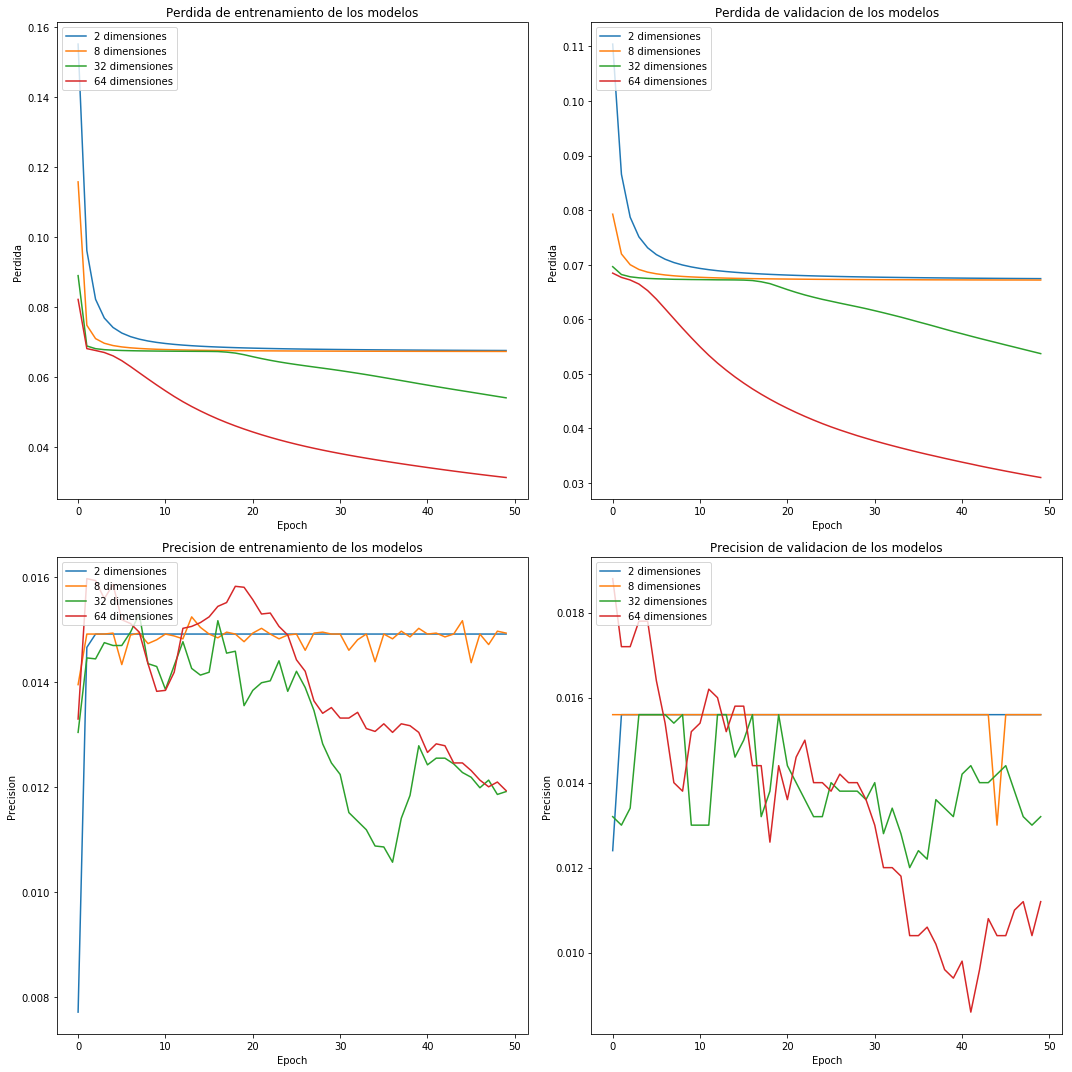

In [0]:
fig, axes = plt.subplots(nrows=2, ncols=2,figsize=(15,15))
ax = axes.flatten()
leg=['2 dimensiones', '8 dimensiones','32 dimensiones','64 dimensiones']
for i in range(len(dim)):
    ax[0].plot(historias[i].history['loss'])
    ax[1].plot(historias[i].history['val_loss'])
    ax[2].plot(historias[i].history['acc'])
    ax[3].plot(historias[i].history['val_acc'])
ax[0].set_title('Perdida de entrenamiento de los modelos')
ax[0].set_ylabel('Perdida')
ax[0].set_xlabel('Epoch')
ax[0].legend(leg, loc='upper left')
ax[1].set_title('Perdida de validacion de los modelos')
ax[1].set_ylabel('Perdida')
ax[1].set_xlabel('Epoch')
ax[1].legend(leg, loc='upper left')
ax[2].set_title('Precision de entrenamiento de los modelos')
ax[2].set_ylabel('Precision')
ax[2].set_xlabel('Epoch')
ax[2].legend(leg, loc='upper left')
ax[3].set_title('Precision de validacion de los modelos')
ax[3].set_ylabel('Precision')
ax[3].set_xlabel('Epoch')
ax[3].legend(leg, loc='upper left')
plt.tight_layout()
plt.show()

Se puede observar que para **d=2 y 8** el entrenamiento rápidamente se satura en precisión, mientras que con **d=32 y 64** se logra un mejor comportamiento, donde después de la abrupta caída de la pérdida, lentamente se logra reducir la pérdida tanto en los conjuntos de entrenamiento como en los de validación.

Sin embargo la precisión de estos dos últimos modelos varía enormemente, sin haber aparentes mejoras.

Se vuelven a generar los modelos, esta vez utilizando ReLU como función de activación.

In [0]:
historias=[]
for i in range(len(dim)):
    start = timer()
    input_img = Input(shape=(784,))
    encoded = Dense(dim[i], activation='relu')(input_img)
    decoded = Dense(784, activation='relu')(encoded)
    autoencoder = Model(input=input_img, output=decoded)
    encoder = Model(input=input_img, output=encoded)
    encoded_input = Input(shape=(dim[i],))
    decoder_layer = autoencoder.layers[-1]
    decoder = Model(input=encoded_input, output=decoder_layer(encoded_input))
    autoencoder.compile(optimizer=SGD(lr=1.0), loss='mean_squared_error',metrics=['accuracy'])
    history=autoencoder.fit(x_train,x_train,epochs=50,batch_size=32,validation_split=val_percent,verbose=0)
    end = timer()
    historias.append(history)
    nombre='relu_autoencoder_768x'+str(dim[i])+'.h5'
    autoencoder.save(nombre)
    nombre='relu_encoder_768x'+str(dim[i])+'.h5'
    encoder.save(nombre)
    print("Tiempo de ejecución para d={}: {} seg".format(dim[i],end - start))

/home/difroggy/anaconda3/envs/redesneuronales/lib/python3.6/site-packages/ipykernel_launcher.py:7: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("de...)`
  import sys
/home/difroggy/anaconda3/envs/redesneuronales/lib/python3.6/site-packages/ipykernel_launcher.py:8: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("de...)`
  
/home/difroggy/anaconda3/envs/redesneuronales/lib/python3.6/site-packages/ipykernel_launcher.py:11: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("de...)`
  # This is added back by InteractiveShellApp.init_path()


Tiempo de ejecución para d=2: 125.52709939499982 seg
Tiempo de ejecución para d=8: 126.87832488599997 seg
Tiempo de ejecución para d=32: 127.24883787399995 seg
Tiempo de ejecución para d=64: 128.21400577399982 seg


La adición de ReLU al modelo significó un aumento en los tiempos de entrenamiento, presentando una diferencia de tiempos similar al conjunto de modelos anterior.

Luego se grafica el historial de entrenamiento de los modelos.

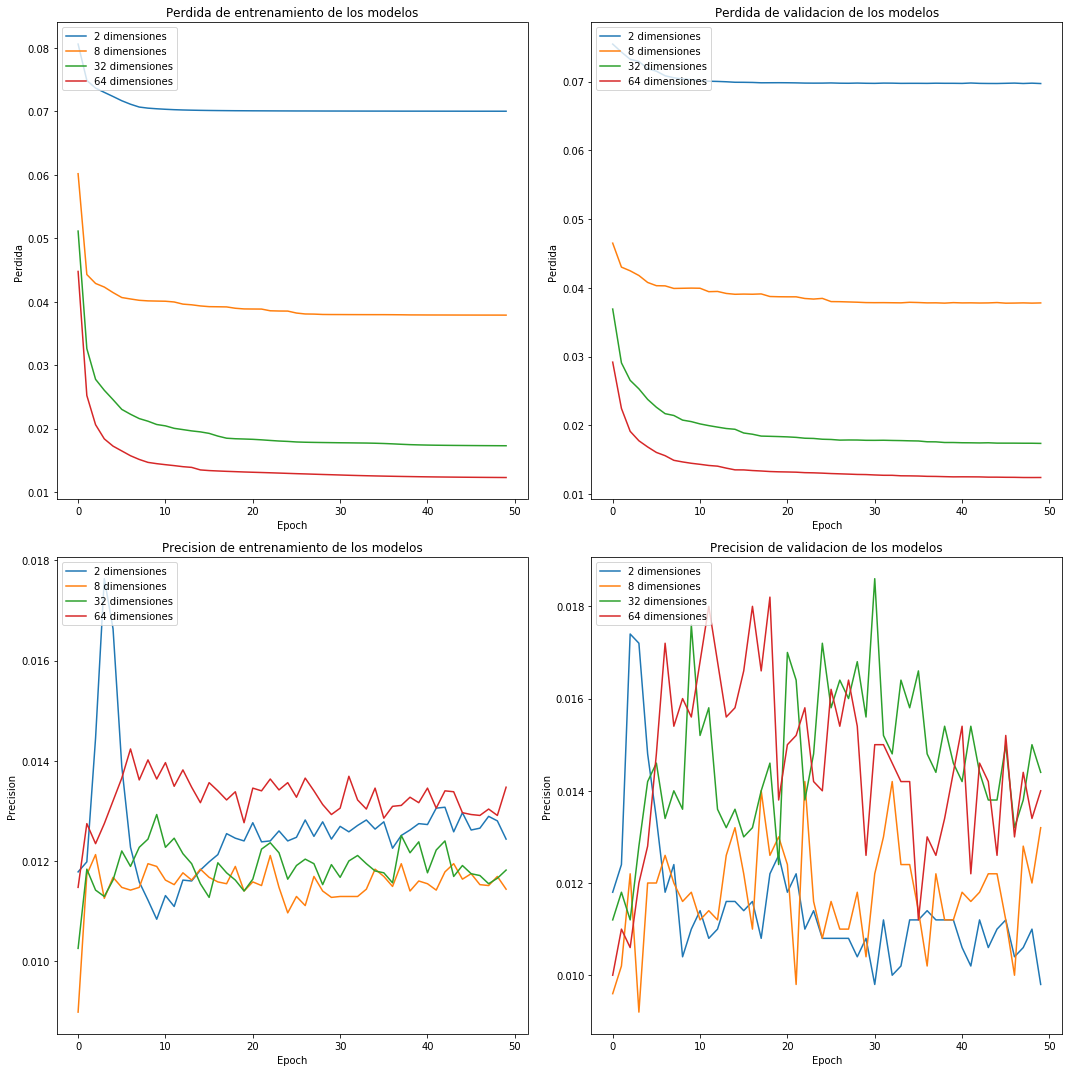

In [0]:
fig, axes = plt.subplots(nrows=2, ncols=2,figsize=(15,15))
ax = axes.flatten()
leg=['2 dimensiones', '8 dimensiones','32 dimensiones','64 dimensiones']
for i in range(len(dim)):
    ax[0].plot(historias[i].history['loss'])
    ax[1].plot(historias[i].history['val_loss'])
    ax[2].plot(historias[i].history['acc'])
    ax[3].plot(historias[i].history['val_acc'])
ax[0].set_title('Perdida de entrenamiento de los modelos')
ax[0].set_ylabel('Perdida')
ax[0].set_xlabel('Epoch')
ax[0].legend(leg, loc='upper left')
ax[1].set_title('Perdida de validacion de los modelos')
ax[1].set_ylabel('Perdida')
ax[1].set_xlabel('Epoch')
ax[1].legend(leg, loc='upper left')
ax[2].set_title('Precision de entrenamiento de los modelos')
ax[2].set_ylabel('Precision')
ax[2].set_xlabel('Epoch')
ax[2].legend(leg, loc='upper left')
ax[3].set_title('Precision de validacion de los modelos')
ax[3].set_ylabel('Precision')
ax[3].set_xlabel('Epoch')
ax[3].legend(leg, loc='upper left')
plt.tight_layout()
plt.show()

Esta vez todos los modelos presentan variaciones esperables durante el entrenamiento. Notar que ahora se puede observar que a mayor dimensionalidad en la compresión, mejor se puede reconstruir la imagen, lo cuál es evidenciado por los primeros dos gráficos.

Por otro lado, los gráficos de precisión siguen fluctuando en gran medida. Como parece aparente, los gráficos de precisión parecen no dar mucha información sobre el desarrollo del entrenamiento.

Parte b)

In [0]:
from keras.models import load_model
from keras import backend as K

Como se repetirá la presentación de imágenes reconstruidas, se define una función que muestra las primera 10 imágenes del conjunto de validación junto a la imagen reconstruida del modelo.

In [0]:
def mostrarComparacion(d,relu=True):
    if(relu):
        nombre='relu_autoencoder_768x'+str(d)+'.h5'
    else:
        nombre='sigmoid_autoencoder_768x'+str(d)+'.h5'
    autoencoder = load_model(nombre)
    inp = autoencoder.input
    outputs = [layer.output for layer in autoencoder.layers]         
    functor = K.function([inp]+ [K.learning_phase()], outputs ) 
    # Testing
    layer_outs = functor([x_test[0:20], 1.])
    fig=plt.figure(figsize=(12,12))
    rows=5
    columns=4
    j=0
    for i in range(1,columns*rows+1):
        fig.add_subplot(rows,columns,i)
        if(i%2==1):
            plt.title('Imagen original')
            plt.imshow(x_test[j].reshape((28,28)),cmap='gray')
        elif(i%2==0):
            plt.title('Imagen reconstruida')
            plt.imshow(layer_outs[2][j].reshape((28,28)),cmap='gray')
            j+=1
    plt.tight_layout()
    plt.show()

Primero se analiza el de **d=2**.

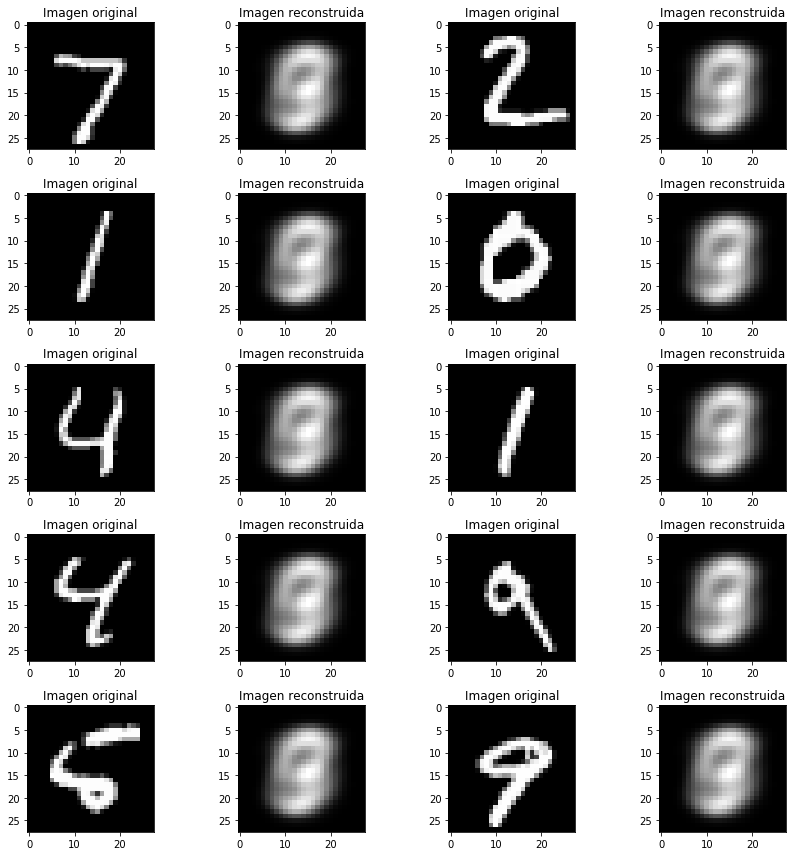

In [0]:
mostrarComparacion(2,False)

El primer modelo sigmoidal no demuestra poder reconocer ninguna imágen, reconstruyendo aparentemente siempre el mismo número.

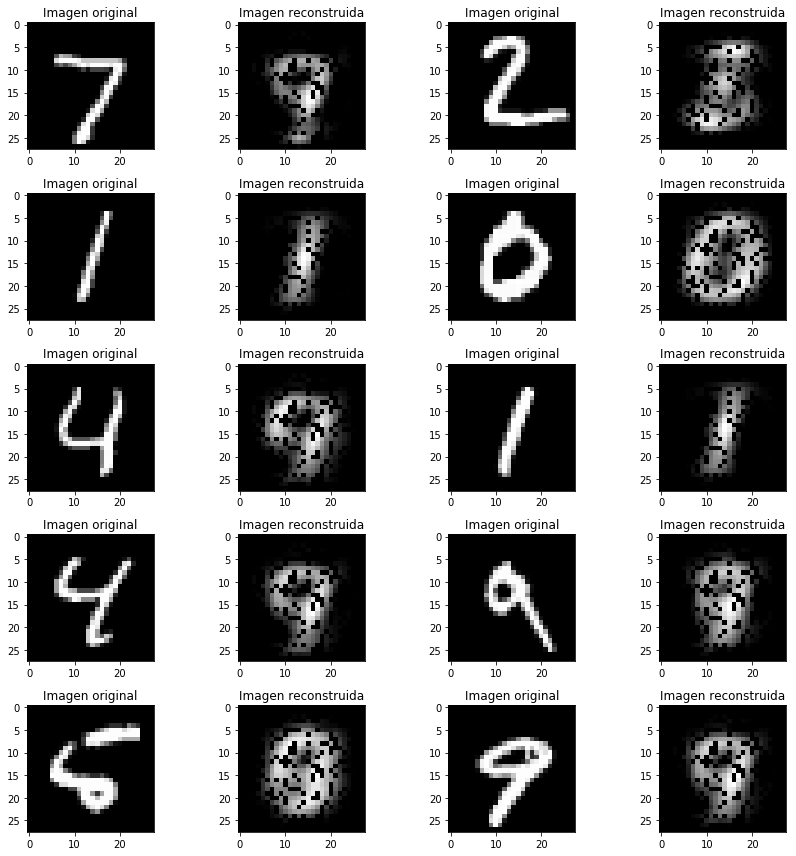

In [0]:
mostrarComparacion(2,True)

Esta vez si se logran apreciar números, con algo de ruido, sin embargo con una dimensionalidad tan pequeña, el modelo sólo puede reconstruir imágenes que tenga una forma aproximada a un **1** y **0**.

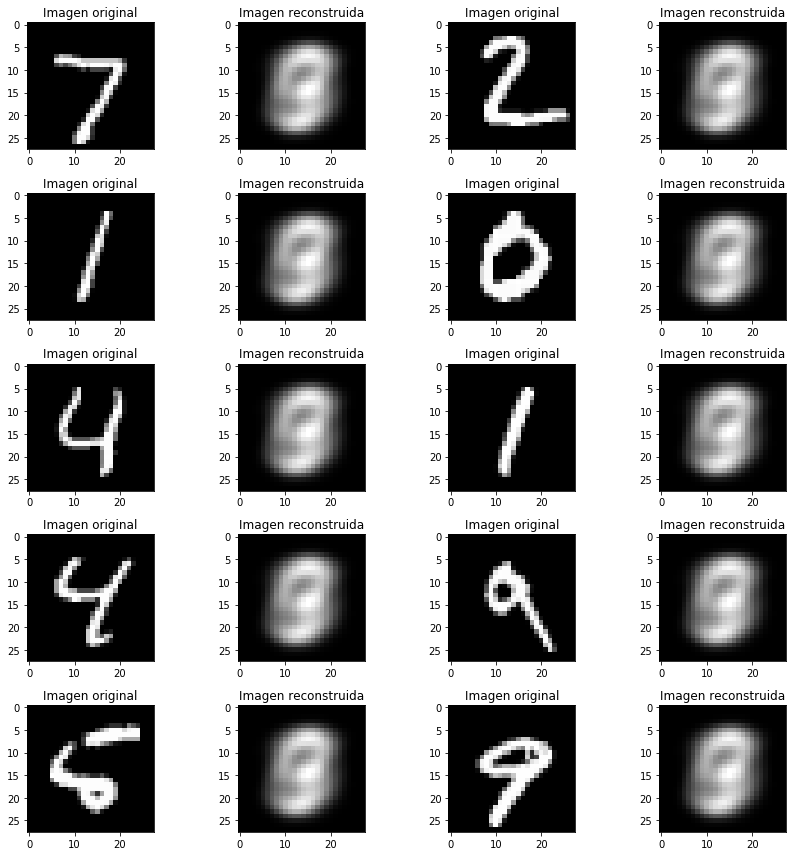

In [0]:
mostrarComparacion(8,False)

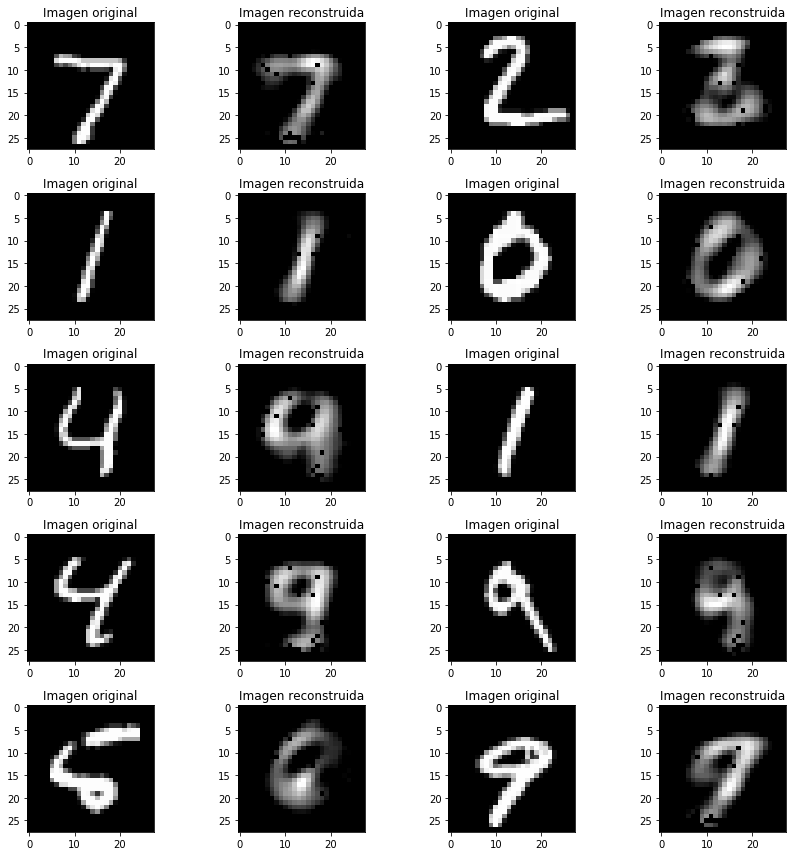

In [0]:
mostrarComparacion(8,True)

Esta vez las imágenes reconstruidas logran mantener a grandes rasgos la forma del número original, a pesar de distar en gran medida. Notar que números como el **4 y el 9** son fáciles de confundir por el modelo.

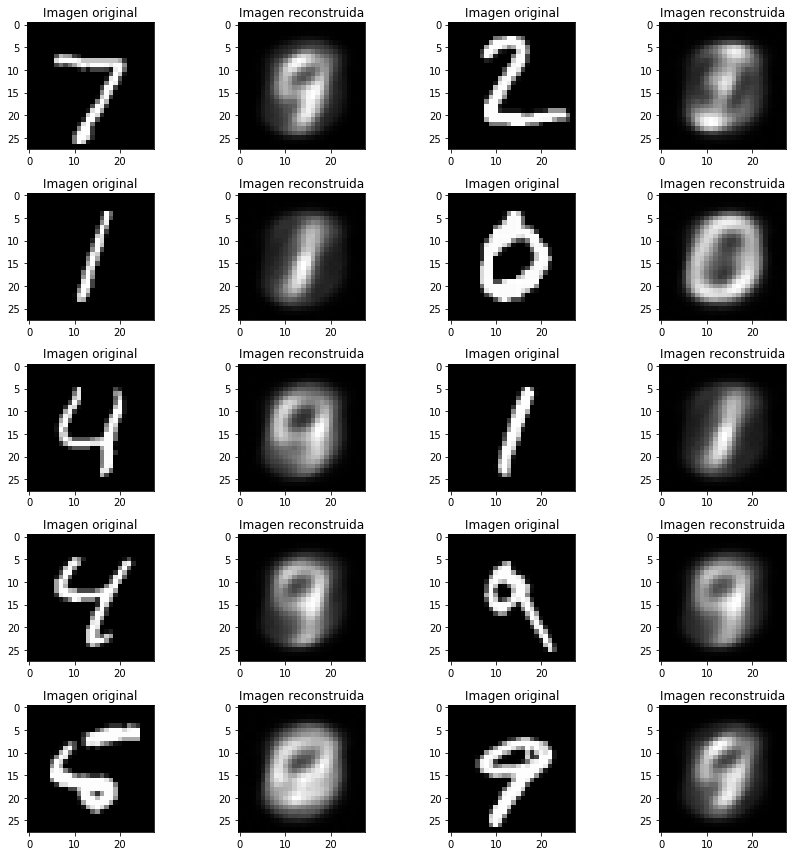

In [0]:
mostrarComparacion(32,False)

Interesantemente, se pueden observar reconstrucciones parciales de los números, sin embargo aún no es distinguible la diferencia entre varios de estos.

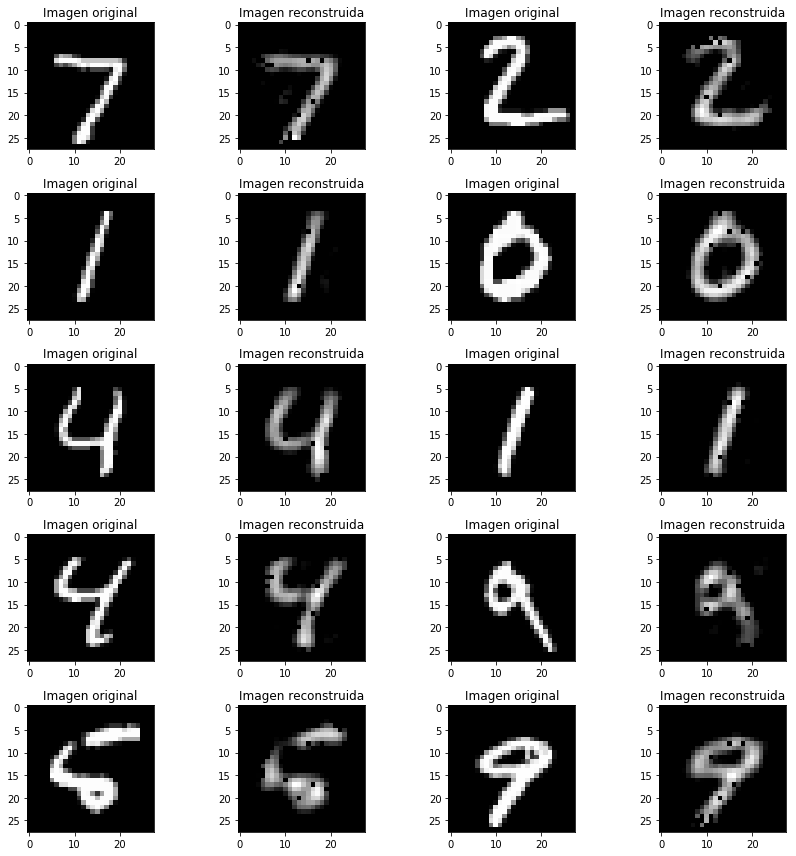

In [0]:
mostrarComparacion(32,True)

Esta vez se logra distinguir mucho mejor la diferencia entre el 4 y el 9, y además la forma de la imagen original puede ser conservada, lo cuál se puede observar en el par de cuatros, que a pesar de corresponder al mismo número, se pueden evidenciar las curvas que los distinguen.

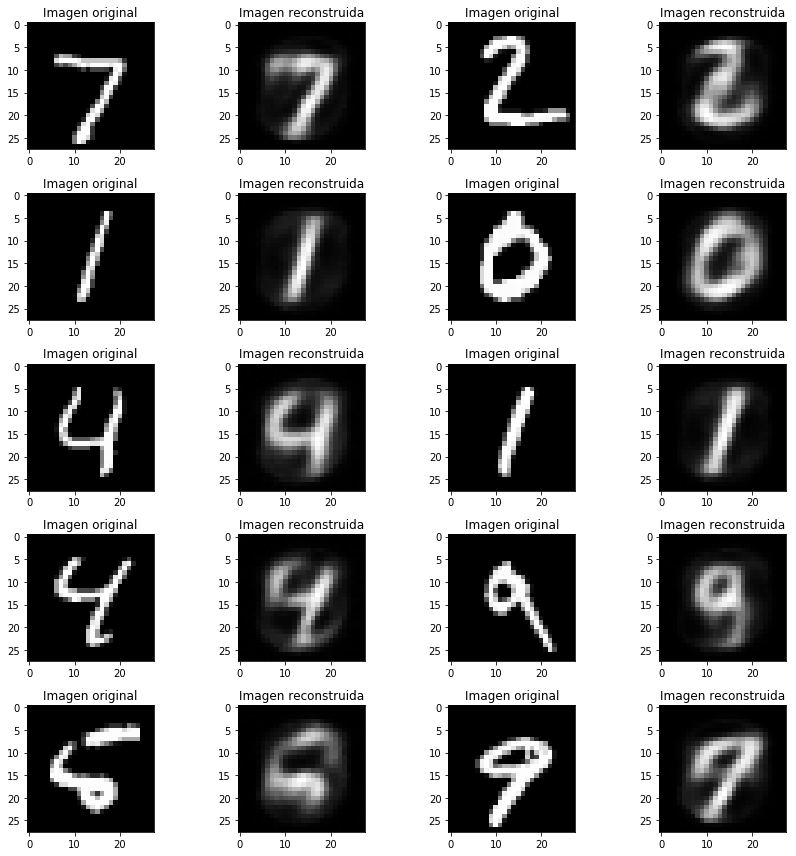

In [0]:
mostrarComparacion(64,False)

En constraste al modelo sigmoidal anterior, ahora se pueden distinguir mucho mejor números como el 6 y el 9, al menos cuando son puestas lado a lado con sus imágenes originales.

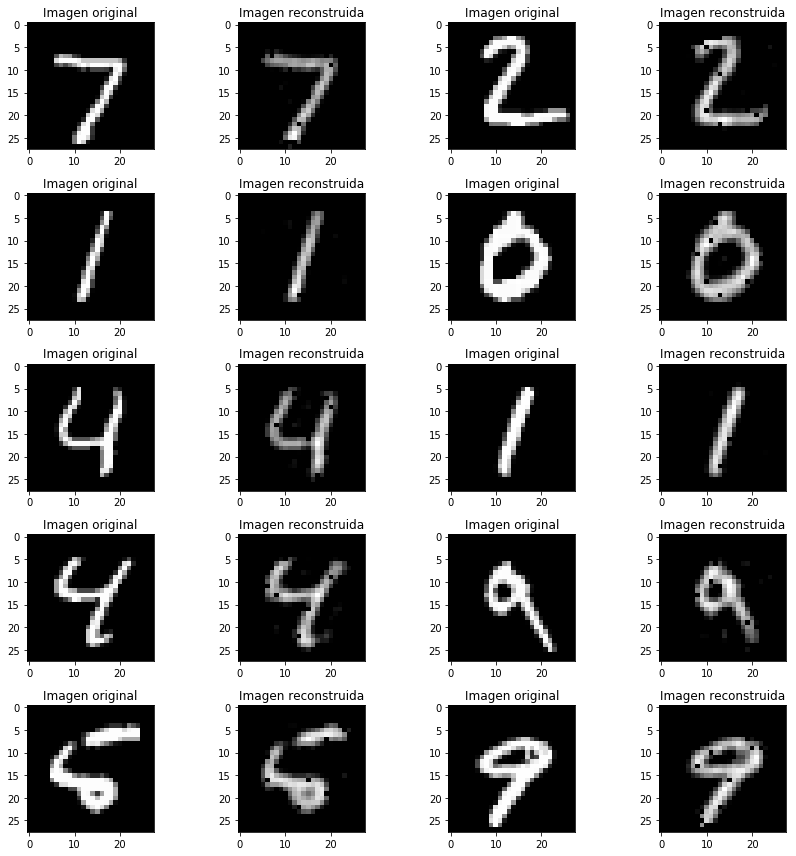

In [0]:
mostrarComparacion(64,True)

Con **d=64** es capaz de reconstruir imágenes con una fidelidad parecidad a la de 32 dimensiones.

Como se hace visualmente evidente, la reconstrucción hecha con función de activación ReLU es mucho mejor que la sigmoidal. Por lo anterior, ya que el modelo es capaz de reconstruir imágenes, se puede intuir que los gráficos de precisión no otorgarán mayor información sobre el entrenamiento de los modelos.

In [0]:
historias_mix=[]
for i in range(len(dim)):
    start = timer()
    input_img = Input(shape=(784,))
    encoded = Dense(dim[i], activation='relu')(input_img)
    decoded = Dense(784, activation='sigmoid')(encoded)
    autoencoder = Model(input=input_img, output=decoded)
    encoder = Model(input=input_img, output=encoded)
    encoded_input = Input(shape=(dim[i],))
    decoder_layer = autoencoder.layers[-1]
    decoder = Model(input=encoded_input, output=decoder_layer(encoded_input))
    autoencoder.compile(optimizer=SGD(lr=1.0), loss='mean_squared_error',metrics=['accuracy'])
    history=autoencoder.fit(x_train,x_train,epochs=50,batch_size=32,validation_split=val_percent,verbose=0)
    historias_mix.append(history)
    nombre='mix_autoencoder_768x'+str(dim[i])+'.h5'
    autoencoder.save(nombre)
    end = timer()
    print("Tiempo de ejecución para d={}: {} seg".format(dim[i],end - start))

/home/difroggy/anaconda3/envs/redesneuronales/lib/python3.6/site-packages/ipykernel_launcher.py:7: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("de...)`
  import sys
/home/difroggy/anaconda3/envs/redesneuronales/lib/python3.6/site-packages/ipykernel_launcher.py:8: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("de...)`
  
/home/difroggy/anaconda3/envs/redesneuronales/lib/python3.6/site-packages/ipykernel_launcher.py:11: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("de...)`
  # This is added back by InteractiveShellApp.init_path()


Tiempo de ejecución para d=2: 133.28485833800005 seg
Tiempo de ejecución para d=8: 122.85240868000005 seg
Tiempo de ejecución para d=32: 123.5789839229999 seg
Tiempo de ejecución para d=64: 125.90926992799996 seg


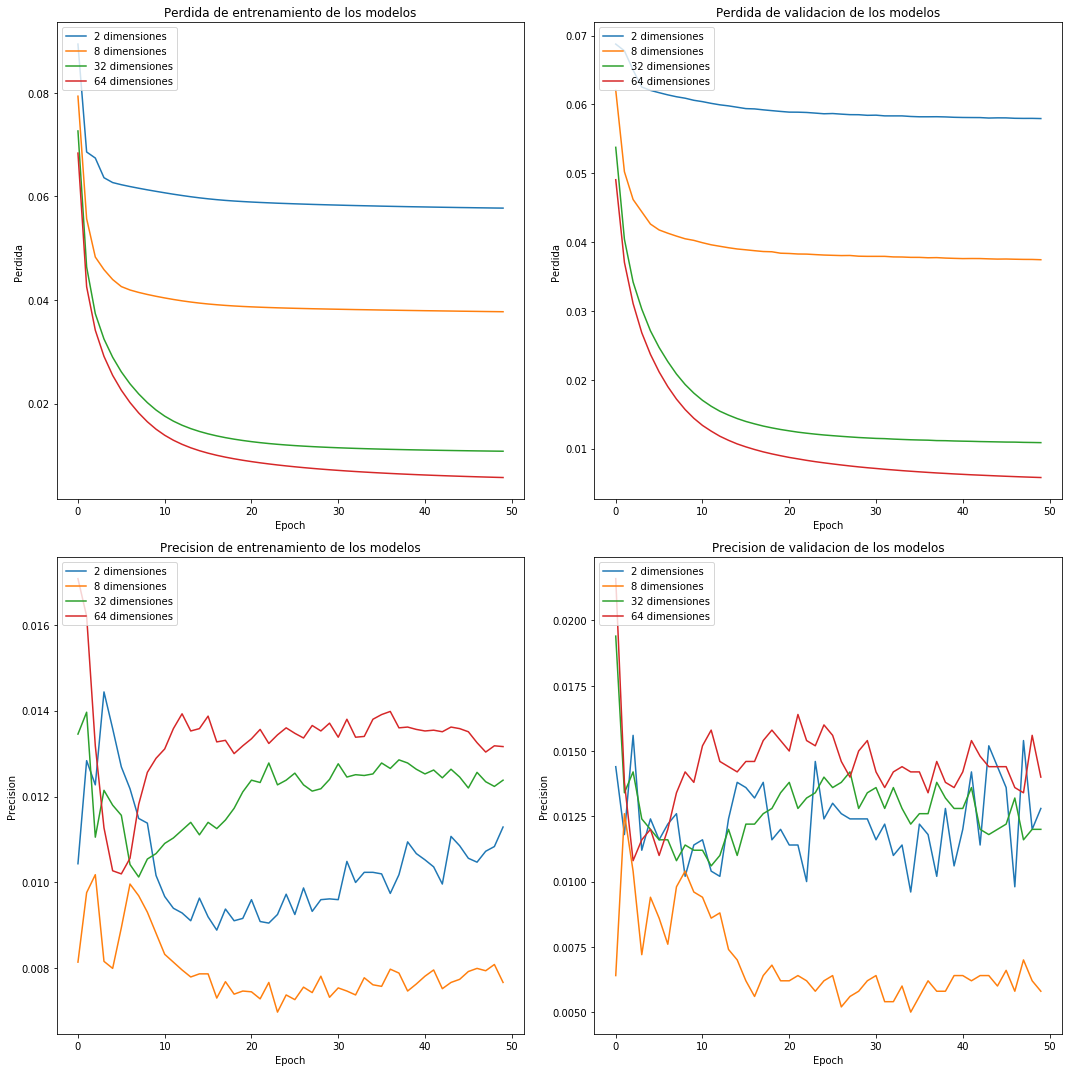

In [0]:
fig, axes = plt.subplots(nrows=2, ncols=2,figsize=(15,15))
ax = axes.flatten()
leg=['2 dimensiones', '8 dimensiones','32 dimensiones','64 dimensiones']
for i in range(len(dim)):
    ax[0].plot(historias_mix[i].history['loss'])
    ax[1].plot(historias_mix[i].history['val_loss'])
    ax[2].plot(historias_mix[i].history['acc'])
    ax[3].plot(historias_mix[i].history['val_acc'])
ax[0].set_title('Perdida de entrenamiento de los modelos')
ax[0].set_ylabel('Perdida')
ax[0].set_xlabel('Epoch')
ax[0].legend(leg, loc='upper left')
ax[1].set_title('Perdida de validacion de los modelos')
ax[1].set_ylabel('Perdida')
ax[1].set_xlabel('Epoch')
ax[1].legend(leg, loc='upper left')
ax[2].set_title('Precision de entrenamiento de los modelos')
ax[2].set_ylabel('Precision')
ax[2].set_xlabel('Epoch')
ax[2].legend(leg, loc='upper left')
ax[3].set_title('Precision de validacion de los modelos')
ax[3].set_ylabel('Precision')
ax[3].set_xlabel('Epoch')
ax[3].legend(leg, loc='upper left')
plt.tight_layout()
plt.show()

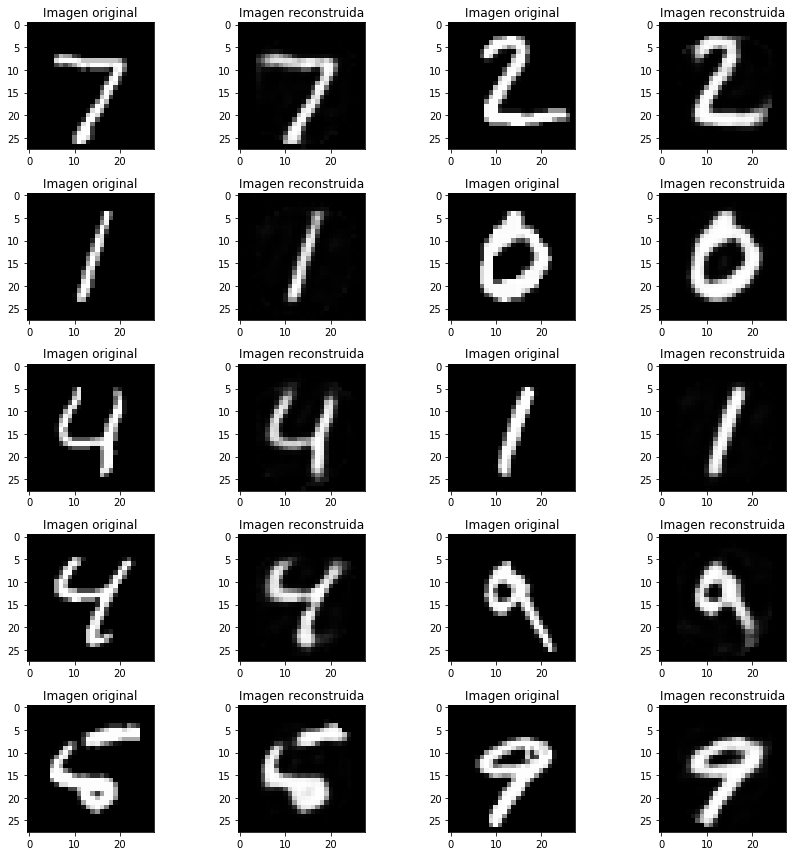

In [0]:
nombre='mix_autoencoder_768x64.h5'
autoencoder = load_model(nombre)
output=autoencoder.predict(x_test[0:10])
fig=plt.figure(figsize=(12,12))
rows=5
columns=4
j=0
for i in range(1,columns*rows+1):
    fig.add_subplot(rows,columns,i)
    if(i%2==1):
        plt.title('Imagen original')
        plt.imshow(x_test[j].reshape((28,28)),cmap='gray')
    elif(i%2==0):
        plt.title('Imagen reconstruida')
        plt.imshow(output[j].reshape((28,28)),cmap='gray')
        j+=1
plt.tight_layout()
plt.show()

Parte c)

PCA es Principal Component Analysis, un método que busca ejes (utilizando vectores y valores propios) donde se contenga la mayor cantidad de información para así poder reducir la dimensión de los datos.

Dado que dos de las dimensiones indicadas por el enunciado son distintas a las de los ítemes anteriores, se crean los modelos con **d'=4** y **d'=16** utilizando la función de activación con mejor desempeño, ReLU.

In [0]:
dim2=[4,16]
historias2=[]
for i in range(len(dim2)):
    start = timer()
    input_img = Input(shape=(784,))
    encoded = Dense(dim2[i], activation='relu')(input_img)
    decoded = Dense(784, activation='relu')(encoded)
    autoencoder = Model(input=input_img, output=decoded)
    encoder = Model(input=input_img, output=encoded)
    encoded_input = Input(shape=(dim2[i],))
    decoder_layer = autoencoder.layers[-1]
    decoder = Model(input=encoded_input, output=decoder_layer(encoded_input))
    autoencoder.compile(optimizer=SGD(lr=1.0), loss='mean_squared_error')
    history=autoencoder.fit(x_train,x_train,epochs=50,batch_size=32,validation_split=val_percent,verbose=0)
    historias2.append(history)
    end = timer()
    nombre='relu_autoencoder_768x'+str(dim2[i])+'.h5'
    autoencoder.save(nombre)
    nombre='relu_encoder_768x'+str(dim2[i])+'.h5'
    encoder.save(nombre)
    print("Tiempo de ejecución para d={}: {} seg".format(dim2[i],end - start))

/home/difroggy/anaconda3/envs/redesneuronales/lib/python3.6/site-packages/ipykernel_launcher.py:8: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("de...)`
  
/home/difroggy/anaconda3/envs/redesneuronales/lib/python3.6/site-packages/ipykernel_launcher.py:9: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("de...)`
  if __name__ == '__main__':
/home/difroggy/anaconda3/envs/redesneuronales/lib/python3.6/site-packages/ipykernel_launcher.py:12: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("de...)`
  if sys.path[0] == '':


Tiempo de ejecución para d=4: 122.50845463000041 seg
Tiempo de ejecución para d=16: 121.86009811999975 seg


Las librerías correspondientes son importadas.

In [0]:
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier

Se procede a extraer la reconstrucción de cada modelo

In [0]:
d=[2,4,8,16,32]
for i in range(len(d)):
    pca = PCA(n_components=d[i])
    #PCA
    pca.fit(x_train)
    pca_train = pca.transform(x_train)
    pca_test = pca.transform(x_test)
    #AUTOENCODER
    nombre='relu_encoder_768x'+str(d[i])+'.h5'
    encoder = load_model(nombre)
    encoded_train = encoder.predict(x_train)
    encoded_test = encoder.predict(x_test)
    #CLASIFICATION
    clf = KNeighborsClassifier(10)
    clf.fit(pca_train, y_train)
    print('d={}'.format(d[i]))
    start = timer()
    print('Classification Accuracy PCA %.2f' % clf.score(pca_test,y_test))
    end = timer()
    print("Tiempo de ejecución: {} seg".format(end - start))
    clf = KNeighborsClassifier(10)
    clf.fit(encoded_train, y_train)
    start = timer()
    print('Classification Accuracy %.2f' % clf.score(encoded_test,y_test))
    end = timer()
    print("Tiempo de ejecución: {} seg".format(end - start))

/home/difroggy/anaconda3/envs/redesneuronales/lib/python3.6/site-packages/keras/models.py:255: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '


d=2
Classification Accuracy PCA 0.19
Tiempo de ejecución: 0.0932981789992482 seg
Classification Accuracy 0.12
Tiempo de ejecución: 0.03156210000088322 seg
d=4
Classification Accuracy PCA 0.17
Tiempo de ejecución: 0.21197903999927803 seg
Classification Accuracy 0.10
Tiempo de ejecución: 0.09495329700075672 seg
d=8
Classification Accuracy PCA 0.44
Tiempo de ejecución: 1.370518424999318 seg
Classification Accuracy 0.21
Tiempo de ejecución: 0.42755257099997834 seg
d=16
Classification Accuracy PCA 0.58
Tiempo de ejecución: 7.97674539900072 seg
Classification Accuracy 0.19
Tiempo de ejecución: 1.3118600669986336 seg
d=32
Classification Accuracy PCA 0.70
Tiempo de ejecución: 32.87040928799979 seg
Classification Accuracy 0.10
Tiempo de ejecución: 2.0321958199983783 seg


Como se puede apreciar, la precisión de clasificación es mucho mayor en PCA.

Parte d)

In [0]:
def mostrarGraficos(historias):
    fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(15,8))
    ax = axes.flatten()
    leg=['2 dimensiones', '4 dimensiones','8 dimensiones','16 dimensiones']
    for i in range(4):
        ax[0].plot(historias[i].history['loss'])
        ax[1].plot(historias[i].history['val_loss'])
    ax[0].set_title('Perdida de entrenamiento de los modelos')
    ax[0].set_ylabel('Perdida')
    ax[0].set_xlabel('Epoch')
    ax[0].legend(leg, loc='upper left')
    ax[1].set_title('Perdida de validacion de los modelos')
    ax[1].set_ylabel('Perdida')
    ax[1].set_xlabel('Epoch')
    ax[1].legend(leg, loc='upper left')
    plt.tight_layout()
    plt.show()

In [0]:
d=[2,4,8,16]
historias22=[]
historias23=[]
historias24=[]
for i in range(3):
    for j in d:
        target_dim = j #try other and do a nice plot
        input_img = Input(shape=(784,))
        if(i==0):
            encoded1 = Dense(250, activation='relu')(input_img)
            encoded4 = Dense(target_dim, activation='relu')(encoded1)
            decoded2 = Dense(250, activation='relu')(encoded4)
            encoder = Model(input=input_img, output=encoded4)
        elif(i==1):
            encoded1 = Dense(500, activation='relu')(input_img)
            encoded2 = Dense(250, activation='relu')(encoded1)
            encoded4 = Dense(target_dim, activation='relu')(encoded2)
            decoded3 = Dense(250, activation='relu')(encoded4)
            decoded2 = Dense(500, activation='relu')(decoded3)
            encoder = Model(input=input_img, output=encoded4)
        elif(i==2):
            encoded1 = Dense(1000, activation='relu')(input_img)
            encoded2 = Dense(500, activation='relu')(encoded1)
            encoded3 = Dense(250, activation='relu')(encoded2)
            encoded4 = Dense(target_dim, activation='relu')(encoded3)
            decoded4 = Dense(250, activation='relu')(encoded4)
            decoded3 = Dense(500, activation='relu')(decoded4)
            decoded2 = Dense(1000, activation='relu')(decoded3)
            encoder = Model(input=input_img, output=encoded4)
        decoded1 = Dense(784, activation='sigmoid')(decoded2)
        autoencoder = Model(input=input_img, output=decoded1)
        autoencoder.compile(optimizer=SGD(lr=1.0), loss='mean_squared_error',metrics=['accuracy'])
        start = timer()
        history=autoencoder.fit(x_train,x_train,epochs=40,batch_size=32,validation_split=val_percent,verbose=0)
        if(i==0):
            historias22.append(history)
        elif(i==1):
            historias23.append(history)
        elif(i==2):
            historias24.append(history)
        end = timer()
        sufijo='x250x'+str(j)+'.h5'
        if(i>0):
            sufijo='x500'+sufijo
            if(i>1):
                sufijo='x1000'+sufijo
        nombre='sigmoid_autoencoder2_768'+sufijo
        autoencoder.save(nombre)
        nombre='sigmoid_encoder2_768'+sufijo
        encoder.save(nombre)
        prof=i+2
        print("Tiempo de ejecución para d={} y L={}: {} seg".format(j,prof,end - start))

/home/difroggy/anaconda3/envs/redesneuronales/lib/python3.6/site-packages/ipykernel_launcher.py:13: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("de...)`
  del sys.path[0]
/home/difroggy/anaconda3/envs/redesneuronales/lib/python3.6/site-packages/ipykernel_launcher.py:31: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("de...)`


Tiempo de ejecución para d=2 y L=2: 155.271467898001 seg
Tiempo de ejecución para d=4 y L=2: 154.56035108500146 seg
Tiempo de ejecución para d=8 y L=2: 144.74431159099913 seg
Tiempo de ejecución para d=16 y L=2: 145.91841827799726 seg


/home/difroggy/anaconda3/envs/redesneuronales/lib/python3.6/site-packages/ipykernel_launcher.py:20: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("de...)`


Tiempo de ejecución para d=2 y L=3: 186.8142177339978 seg
Tiempo de ejecución para d=4 y L=3: 185.86974633700083 seg
Tiempo de ejecución para d=8 y L=3: 187.61282295699857 seg
Tiempo de ejecución para d=16 y L=3: 187.1162657620007 seg


/home/difroggy/anaconda3/envs/redesneuronales/lib/python3.6/site-packages/ipykernel_launcher.py:29: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("de...)`


Tiempo de ejecución para d=2 y L=4: 297.1925287430022 seg
Tiempo de ejecución para d=4 y L=4: 291.8692527669991 seg
Tiempo de ejecución para d=8 y L=4: 298.0588279399999 seg
Tiempo de ejecución para d=16 y L=4: 292.05742603900217 seg


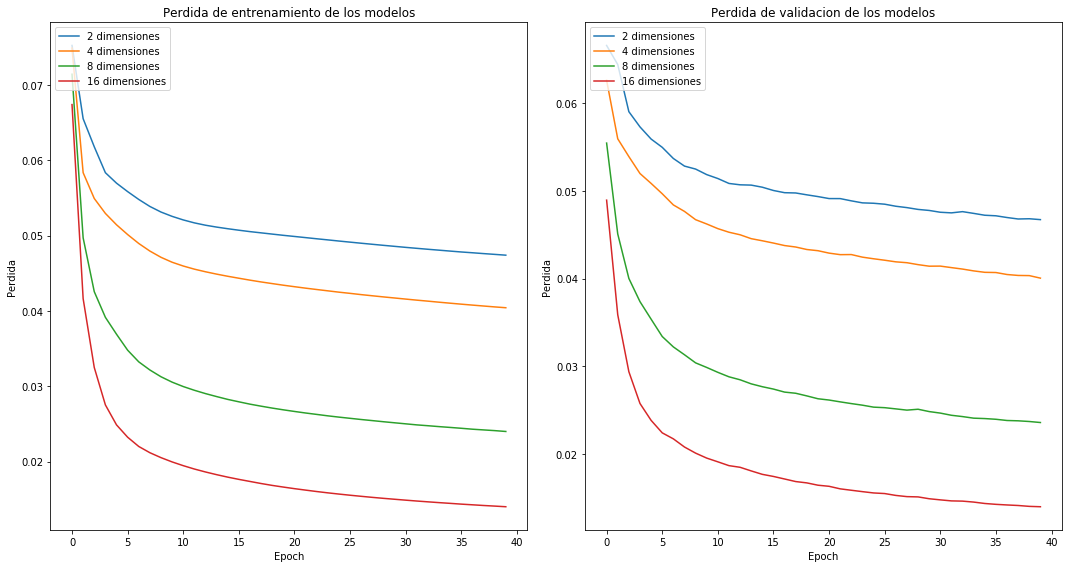

In [0]:
mostrarGraficos(historias22)

Comportamiento anterior en modelos con reducción a 4 y 8 dimensiones indica la existencia de _NaN_ como resultado de cálculos de pérdida y precisión, lo cuál puede atribuirse a un problema de gradiente explosiva.

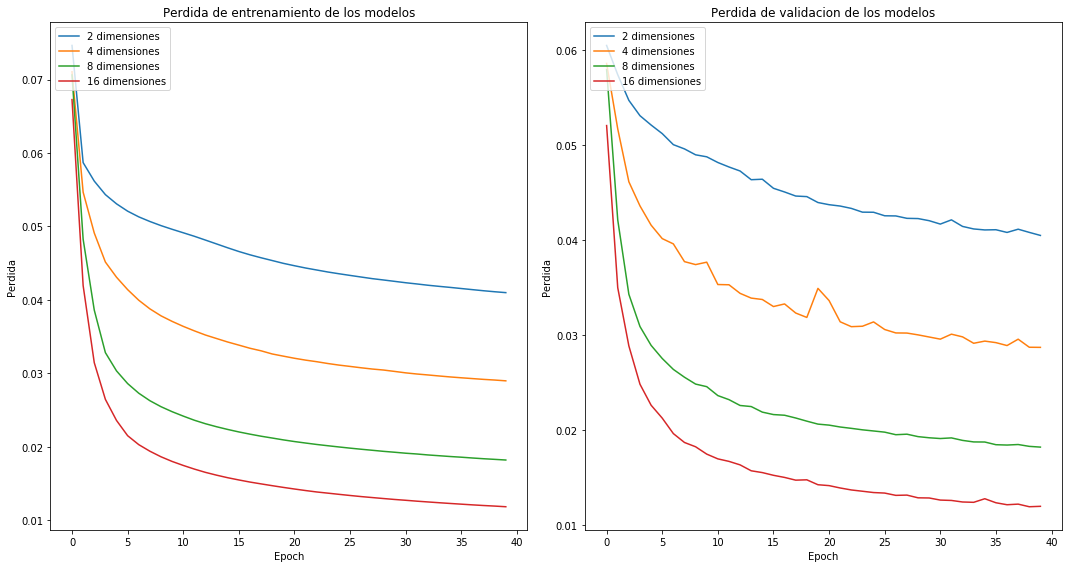

In [0]:
mostrarGraficos(historias23)

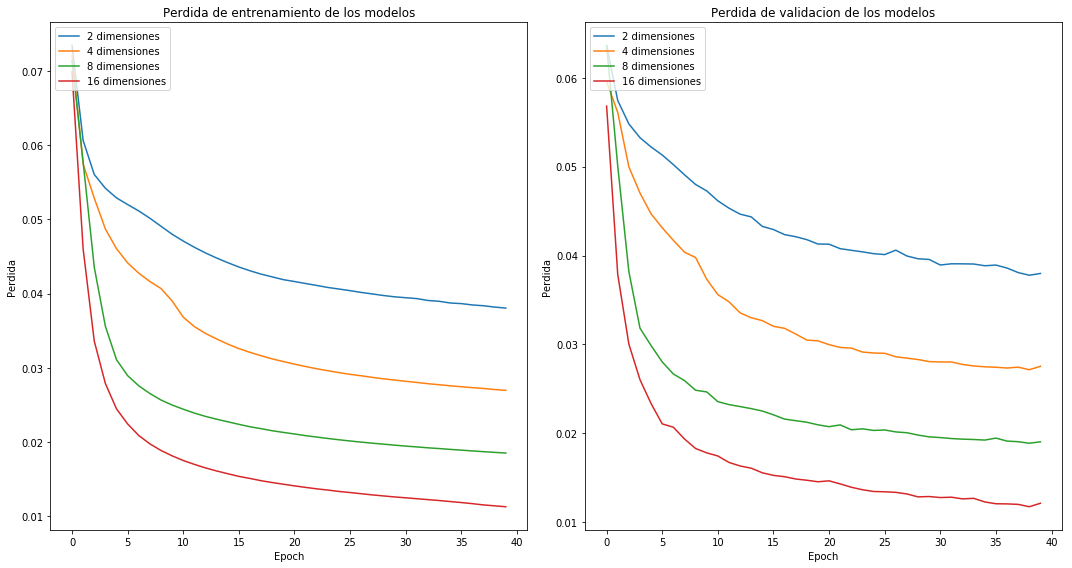

In [0]:
mostrarGraficos(historias24)

Agregar más capas (con un total de 4 capas escondidas) presenta resultados más fáciles de interpretar como aprendizaje. Se puede observar de que el tamaño de la dimensión a la que se reduce la imagen tiene menor impacto, hasta el punto de ser casi imperceptible, lo que puede ser indicador de que la complejidad de las capas ocultas compensa cualquier pérdida de información durante la compresión de la imagen.

Sin embargo, la precisión de la reconstrucción varía enormemente, independiente de la dimensión.

En efecto, a pesar de lograr conservar la parte más distintiva de la imagen original, se generan artefactos en la reconstrucción de la imagen.

In [0]:
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
import numpy as np

In [0]:
def kNeighbors(prefijo):
    d=[2,4,8,16]
    profundidad=[2,3,4]
    for i in range(len(d)):
        tiempos=[]
        flag=True
        for j in range(len(profundidad)):
            if(flag):
                pca = PCA(n_components=d[i])
                #PCA
                pca.fit(x_train)
                pca_train = pca.transform(x_train)
                pca_test = pca.transform(x_test)
            #AUTOENCODER
            sufijo='x250x'+str(d[i])+'.h5'
            if(j>0):
                sufijo='x500'+sufijo
                if(j>1):
                    sufijo='x1000'+sufijo
            nombre=prefijo+'_768'+sufijo
            encoder = load_model(nombre)
            # Testing
            encoded_train = encoder.predict(x_train)
            encoded_test = encoder.predict(x_test)
            #CLASIFICATION
            if(flag):
                print('d={}'.format(d[i]))

                clf = KNeighborsClassifier(10)
                start = timer()
                clf.fit(pca_train, y_train)
                print('Classification Accuracy PCA %.2f' % clf.score(pca_test,y_test))
                end = timer()
                print("Tiempo de ejecución PCA: {0:.2f} seg".format(end - start))
                flag=False
            clf = KNeighborsClassifier(10)
            start = timer()
            clf.fit(encoded_train, y_train)
            print('Classification Accuracy {0:.2f}, L={1}'.format(clf.score(encoded_test,y_test),profundidad[j]))
            end = timer()
            tiempos.append(end-start)
        print("Tiempo de ejecución promedio: {0:.2f} seg".format(np.mean(tiempos)))
        print("------------------------------------")

In [0]:
kNeighbors('sigmoid_encoder2')

/home/difroggy/anaconda3/envs/redesneuronales/lib/python3.6/site-packages/keras/models.py:255: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '


d=2
Classification Accuracy PCA 0.44
Tiempo de ejecución PCA: 0.06 seg
Classification Accuracy 0.62, L=2
Classification Accuracy 0.75, L=3
Classification Accuracy 0.73, L=4
Tiempo de ejecución promedio: 0.07 seg
------------------------------------
d=4
Classification Accuracy PCA 0.65
Tiempo de ejecución PCA: 0.15 seg
Classification Accuracy 0.72, L=2
Classification Accuracy 0.85, L=3
Classification Accuracy 0.88, L=4
Tiempo de ejecución promedio: 0.14 seg
------------------------------------
d=8
Classification Accuracy PCA 0.90
Tiempo de ejecución PCA: 0.81 seg
Classification Accuracy 0.91, L=2
Classification Accuracy 0.94, L=3
Classification Accuracy 0.95, L=4
Tiempo de ejecución promedio: 0.64 seg
------------------------------------
d=16
Classification Accuracy PCA 0.96
Tiempo de ejecución PCA: 5.39 seg
Classification Accuracy 0.96, L=2
Classification Accuracy 0.97, L=3
Classification Accuracy 0.96, L=4
Tiempo de ejecución promedio: 5.38 seg
------------------------------------


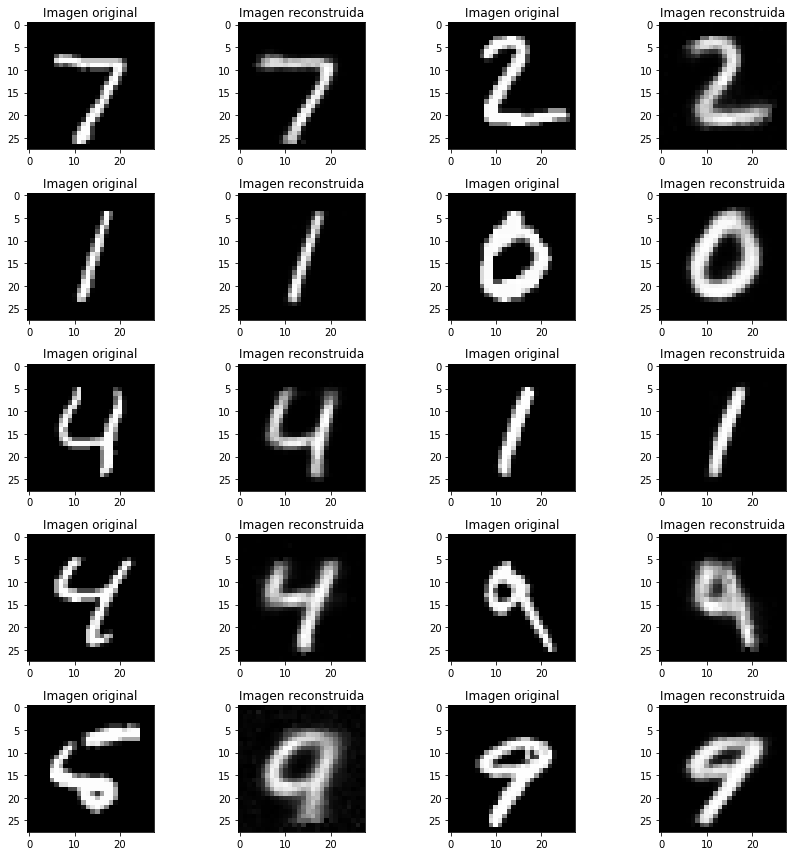

In [0]:
nombre='sigmoid_autoencoder2_768x1000x500x250x8.h5'
autoencoder = load_model(nombre)
output=autoencoder.predict(x_test[0:10])
fig=plt.figure(figsize=(12,12))
rows=5
columns=4
j=0
for i in range(1,columns*rows+1):
    fig.add_subplot(rows,columns,i)
    if(i%2==1):
        plt.title('Imagen original')
        plt.imshow(x_test[j].reshape((28,28)),cmap='gray')
    elif(i%2==0):
        plt.title('Imagen reconstruida')
        plt.imshow(output[j].reshape((28,28)),cmap='gray')
        j+=1
plt.tight_layout()
plt.show()

In [0]:
d=[2,4,8,16]
historias42=[]
historias43=[]
historias44=[]
for i in range(3):
    for j in d:
        target_dim = j #try other and do a nice plot
        input_img = Input(shape=(784,))
        if(i==0):
            encoded1 = Dense(250, activation='relu')(input_img)
            encoded4 = Dense(target_dim, activation='relu')(encoded1)
            decoded2 = Dense(250, activation='relu')(encoded4)
            encoder = Model(input=input_img, output=encoded4)
        elif(i==1):
            encoded1 = Dense(500, activation='relu')(input_img)
            encoded2 = Dense(250, activation='relu')(encoded1)
            encoded4 = Dense(target_dim, activation='relu')(encoded2)
            decoded3 = Dense(250, activation='relu')(encoded4)
            decoded2 = Dense(500, activation='relu')(decoded3)
            encoder = Model(input=input_img, output=encoded4)
        elif(i==2):
            encoded1 = Dense(1000, activation='relu')(input_img)
            encoded2 = Dense(500, activation='relu')(encoded1)
            encoded3 = Dense(250, activation='relu')(encoded2)
            encoded4 = Dense(target_dim, activation='relu')(encoded3)
            decoded4 = Dense(250, activation='relu')(encoded4)
            decoded3 = Dense(500, activation='relu')(decoded4)
            decoded2 = Dense(1000, activation='relu')(decoded3)
            encoder = Model(input=input_img, output=encoded4)
        decoded1 = Dense(784, activation='sigmoid')(decoded2)
        autoencoder = Model(input=input_img, output=decoded1)
        autoencoder.compile(optimizer=Adam(), loss='mean_squared_error')
        start = timer()
        history=autoencoder.fit(x_train,x_train,epochs=40,batch_size=128,validation_split=val_percent,verbose=0)
        if(i==0):
            historias42.append(history)
        elif(i==1):
            historias43.append(history)
        elif(i==2):
            historias44.append(history)
        end = timer()
        sufijo='x250x'+str(j)+'.h5'
        if(i>0):
            sufijo='x500'+sufijo
            if(i>1):
                sufijo='x1000'+sufijo
        nombre='my_autoencoder4_768'+sufijo
        autoencoder.save(nombre)
        nombre='my_encoder4_768'+sufijo
        encoder.save(nombre)
        prof=i+2
        print("Tiempo de ejecución para d={} y L={}: {} seg".format(j,prof,end - start))

/home/difroggy/anaconda3/envs/redesneuronales/lib/python3.6/site-packages/ipykernel_launcher.py:13: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("de...)`
  del sys.path[0]
/home/difroggy/anaconda3/envs/redesneuronales/lib/python3.6/site-packages/ipykernel_launcher.py:31: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("de...)`


Tiempo de ejecución para d=2 y L=2: 65.78490163300012 seg
Tiempo de ejecución para d=4 y L=2: 62.967721331002394 seg
Tiempo de ejecución para d=8 y L=2: 64.50936756300143 seg
Tiempo de ejecución para d=16 y L=2: 63.0359156049999 seg


/home/difroggy/anaconda3/envs/redesneuronales/lib/python3.6/site-packages/ipykernel_launcher.py:20: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("de...)`


Tiempo de ejecución para d=2 y L=3: 89.82260102700093 seg
Tiempo de ejecución para d=4 y L=3: 90.92102602799787 seg
Tiempo de ejecución para d=8 y L=3: 90.70770537800126 seg
Tiempo de ejecución para d=16 y L=3: 92.08846128699952 seg


/home/difroggy/anaconda3/envs/redesneuronales/lib/python3.6/site-packages/ipykernel_launcher.py:29: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("de...)`


Tiempo de ejecución para d=2 y L=4: 164.81218830099897 seg
Tiempo de ejecución para d=4 y L=4: 166.0535817730015 seg
Tiempo de ejecución para d=8 y L=4: 165.52304693199767 seg
Tiempo de ejecución para d=16 y L=4: 167.720092440999 seg


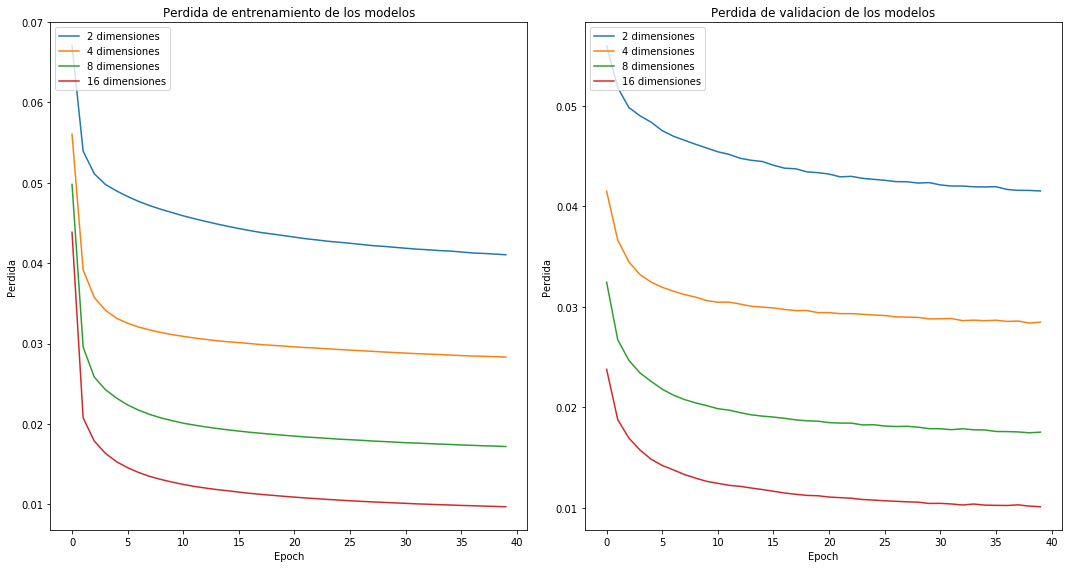

In [0]:
mostrarGraficos(historias42)

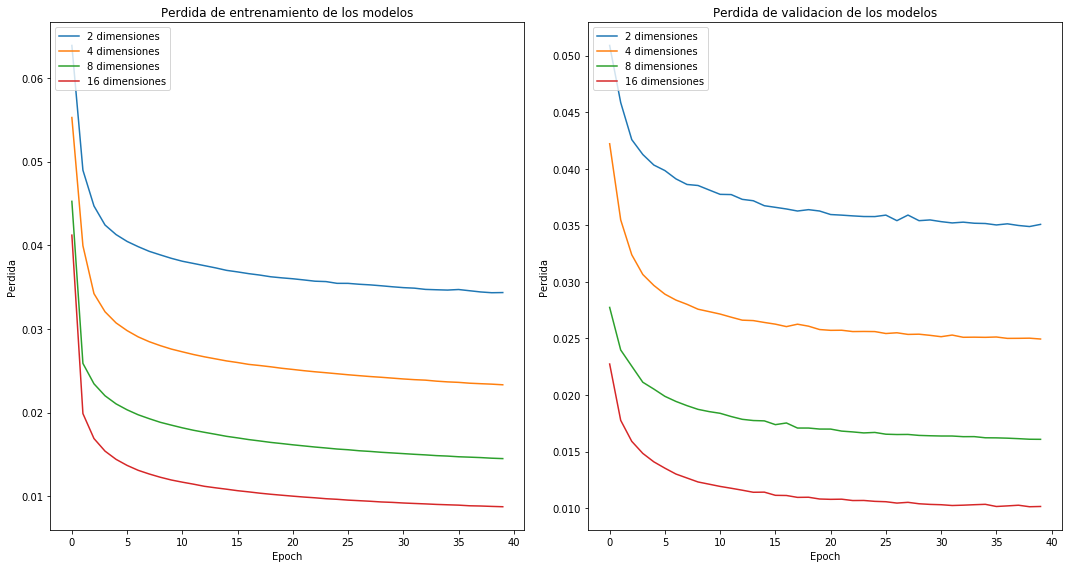

In [0]:
mostrarGraficos(historias43)

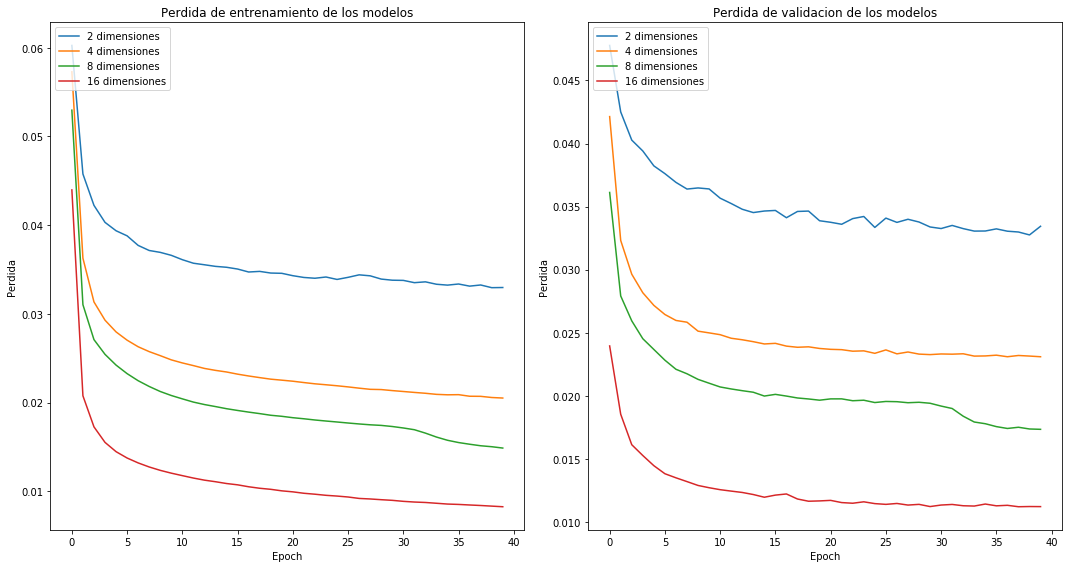

In [0]:
mostrarGraficos(historias44)

In [0]:
kNeighbors('my_encoder4')

/home/difroggy/anaconda3/envs/redesneuronales/lib/python3.6/site-packages/keras/models.py:255: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '


d=2
Classification Accuracy PCA 0.44
Tiempo de ejecución PCA: 0.07 seg
Classification Accuracy 0.70, L=2
Classification Accuracy 0.81, L=3
Classification Accuracy 0.87, L=4
Tiempo de ejecución promedio: 0.08 seg
------------------------------------
d=4
Classification Accuracy PCA 0.65
Tiempo de ejecución PCA: 0.18 seg
Classification Accuracy 0.84, L=2
Classification Accuracy 0.91, L=3
Classification Accuracy 0.94, L=4
Tiempo de ejecución promedio: 0.15 seg
------------------------------------
d=8
Classification Accuracy PCA 0.90
Tiempo de ejecución PCA: 0.90 seg
Classification Accuracy 0.94, L=2
Classification Accuracy 0.96, L=3
Classification Accuracy 0.96, L=4
Tiempo de ejecución promedio: 0.63 seg
------------------------------------
d=16
Classification Accuracy PCA 0.96
Tiempo de ejecución PCA: 6.60 seg
Classification Accuracy 0.97, L=2
Classification Accuracy 0.97, L=3
Classification Accuracy 0.96, L=4
Tiempo de ejecución promedio: 5.10 seg
------------------------------------


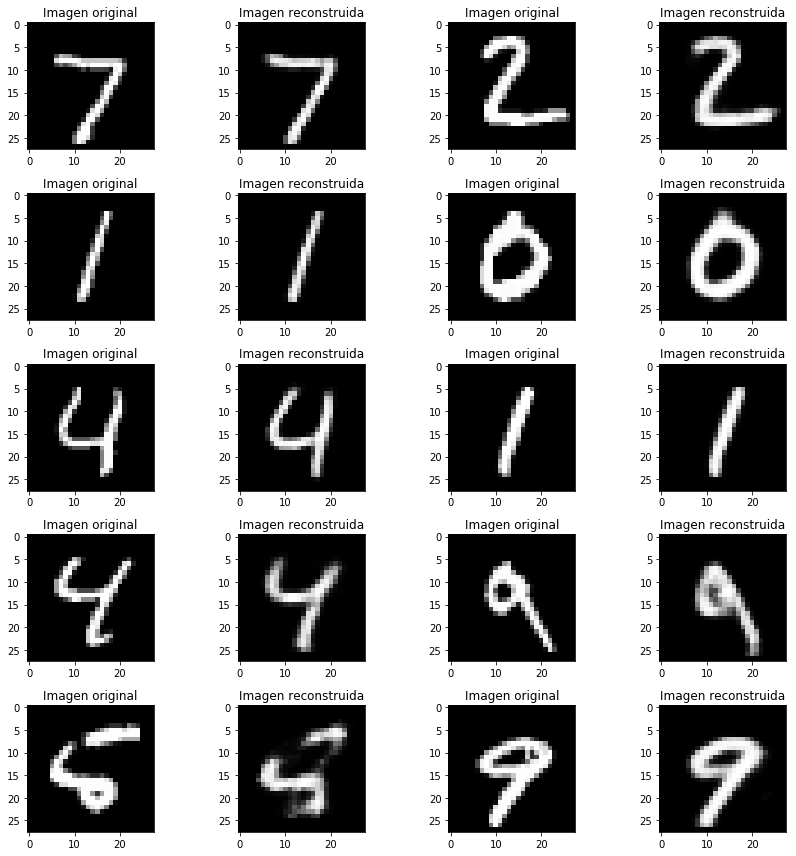

In [0]:
nombre='my_autoencoder4_768x1000x500x250x16.h5'
autoencoder = load_model(nombre)
output=autoencoder.predict(x_test[0:10])

fig=plt.figure(figsize=(12,12))
rows=5
columns=4
j=0
for i in range(1,columns*rows+1):
    fig.add_subplot(rows,columns,i)
    if(i%2==1):
        plt.title('Imagen original')
        plt.imshow(x_test[j].reshape((28,28)),cmap='gray')
    elif(i%2==0):
        plt.title('Imagen reconstruida')
        plt.imshow(output[j].reshape((28,28)),cmap='gray')
        j+=1
plt.tight_layout()
plt.show()

In [0]:
d=[2,4,8,16]
historias52=[]
historias53=[]
historias54=[]
for i in range(3):
    for j in d:
        target_dim = j #try other and do a nice plot
        input_img = Input(shape=(784,))
        if(i==0):
            encoded1 = Dense(250, activation='relu')(input_img)
            encoded4 = Dense(target_dim, activation='relu')(encoded1)
            decoded2 = Dense(250, activation='relu')(encoded4)
            encoder = Model(input=input_img, output=encoded4)
        elif(i==1):
            encoded1 = Dense(500, activation='relu')(input_img)
            encoded2 = Dense(250, activation='relu')(encoded1)
            encoded4 = Dense(target_dim, activation='relu')(encoded2)
            decoded3 = Dense(250, activation='relu')(encoded4)
            decoded2 = Dense(500, activation='relu')(decoded3)
            encoder = Model(input=input_img, output=encoded4)
        elif(i==2):
            encoded1 = Dense(1000, activation='relu')(input_img)
            encoded2 = Dense(500, activation='relu')(encoded1)
            encoded3 = Dense(250, activation='relu')(encoded2)
            encoded4 = Dense(target_dim, activation='relu')(encoded3)
            decoded4 = Dense(250, activation='relu')(encoded4)
            decoded3 = Dense(500, activation='relu')(decoded4)
            decoded2 = Dense(1000, activation='relu')(decoded3)
            encoder = Model(input=input_img, output=encoded4)
        decoded1 = Dense(784, activation='sigmoid')(decoded2)
        autoencoder = Model(input=input_img, output=decoded1)
        autoencoder.compile(optimizer=Adam(), loss='binary_crossentropy')
        start = timer()
        history=autoencoder.fit(x_train,x_train,epochs=40,batch_size=128,validation_split=val_percent,verbose=0)
        if(i==0):
            historias52.append(history)
        elif(i==1):
            historias53.append(history)
        elif(i==2):
            historias54.append(history)
        end = timer()
        sufijo='x250x'+str(j)+'.h5'
        if(i>0):
            sufijo='x500'+sufijo
            if(i>1):
                sufijo='x1000'+sufijo
        nombre='my_autoencoder5_768'+sufijo
        autoencoder.save(nombre)
        nombre='my_encoder5_768'+sufijo
        encoder.save(nombre)
        prof=i+2
        print("Tiempo de ejecución para d={} y L={}: {} seg".format(j,prof,end - start))

/home/difroggy/anaconda3/envs/redesneuronales/lib/python3.6/site-packages/ipykernel_launcher.py:13: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("de...)`
  del sys.path[0]
/home/difroggy/anaconda3/envs/redesneuronales/lib/python3.6/site-packages/ipykernel_launcher.py:31: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("de...)`


Tiempo de ejecución para d=2 y L=2: 93.01359329800107 seg
Tiempo de ejecución para d=4 y L=2: 92.41511249100222 seg
Tiempo de ejecución para d=8 y L=2: 93.47034564800197 seg
Tiempo de ejecución para d=16 y L=2: 93.19248121400233 seg


/home/difroggy/anaconda3/envs/redesneuronales/lib/python3.6/site-packages/ipykernel_launcher.py:20: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("de...)`


Tiempo de ejecución para d=2 y L=3: 122.85072082600163 seg
Tiempo de ejecución para d=4 y L=3: 121.52690416699988 seg
Tiempo de ejecución para d=8 y L=3: 121.61412194400327 seg
Tiempo de ejecución para d=16 y L=3: 120.94220490300359 seg


/home/difroggy/anaconda3/envs/redesneuronales/lib/python3.6/site-packages/ipykernel_launcher.py:29: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("de...)`


Tiempo de ejecución para d=2 y L=4: 200.37715092200233 seg
Tiempo de ejecución para d=4 y L=4: 199.36345789900224 seg
Tiempo de ejecución para d=8 y L=4: 201.317272829001 seg
Tiempo de ejecución para d=16 y L=4: 201.57999199699407 seg


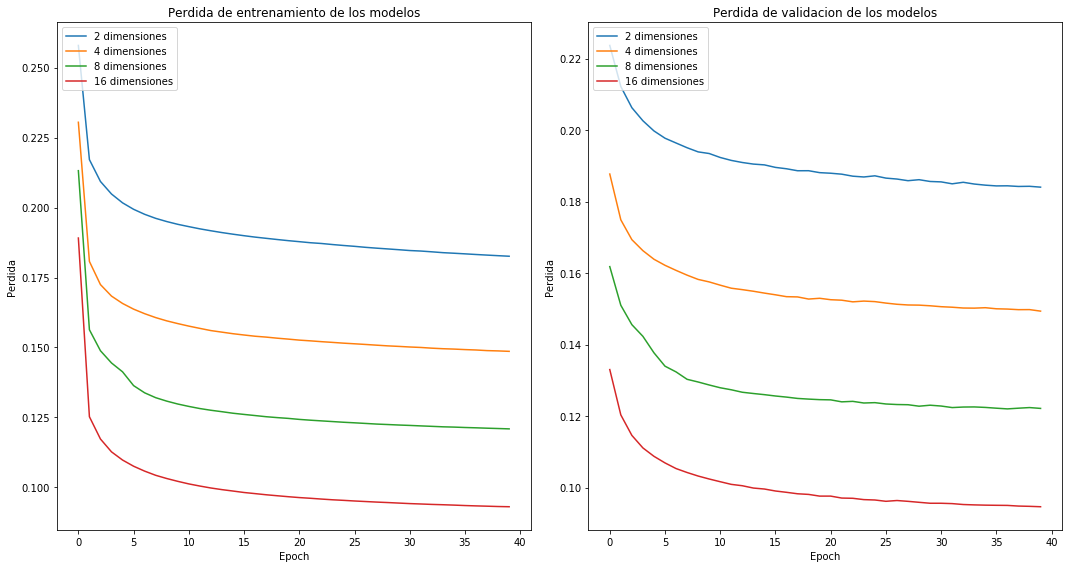

In [0]:
mostrarGraficos(historias52)

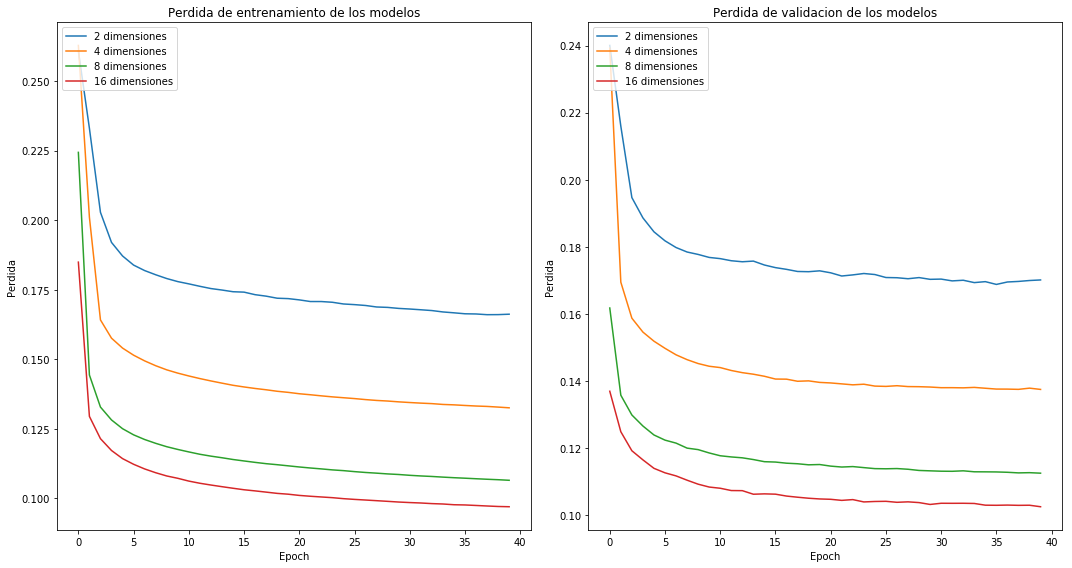

In [0]:
mostrarGraficos(historias53)

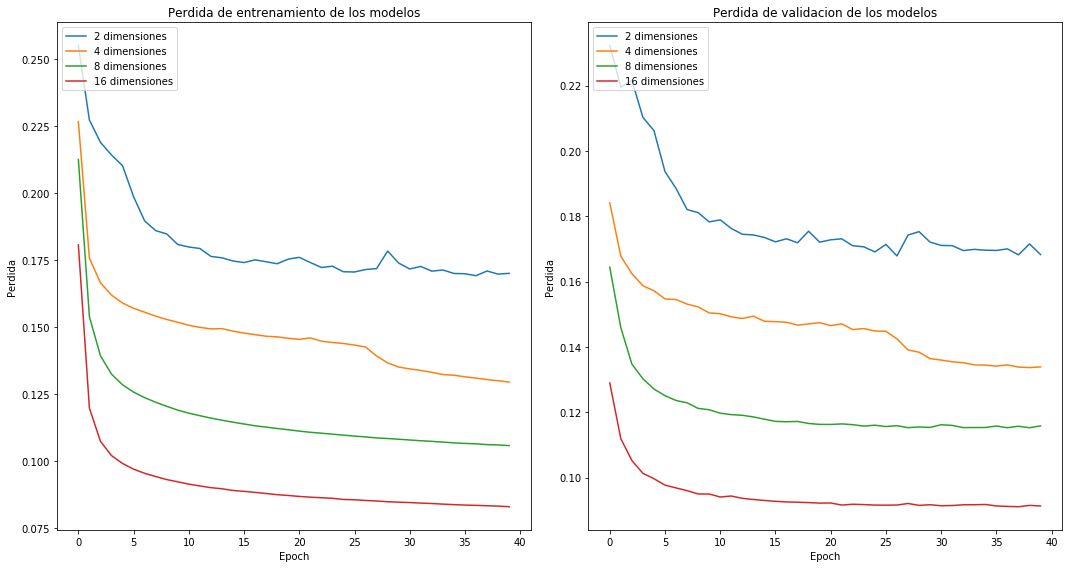

In [0]:
mostrarGraficos(historias54)

In [0]:
kNeighbors('my_encoder5')

/home/difroggy/anaconda3/envs/redesneuronales/lib/python3.6/site-packages/keras/models.py:255: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '


d=2
Classification Accuracy PCA 0.44
Tiempo de ejecución PCA: 0.07 seg
Classification Accuracy 0.66, L=2
Classification Accuracy 0.77, L=3
Classification Accuracy 0.80, L=4
Tiempo de ejecución promedio: 0.06 seg
------------------------------------
d=4
Classification Accuracy PCA 0.65
Tiempo de ejecución PCA: 0.16 seg
Classification Accuracy 0.85, L=2
Classification Accuracy 0.91, L=3
Classification Accuracy 0.93, L=4
Tiempo de ejecución promedio: 0.14 seg
------------------------------------
d=8
Classification Accuracy PCA 0.90
Tiempo de ejecución PCA: 0.88 seg
Classification Accuracy 0.93, L=2
Classification Accuracy 0.96, L=3
Classification Accuracy 0.96, L=4
Tiempo de ejecución promedio: 0.55 seg
------------------------------------
d=16
Classification Accuracy PCA 0.96
Tiempo de ejecución PCA: 5.99 seg
Classification Accuracy 0.96, L=2
Classification Accuracy 0.96, L=3
Classification Accuracy 0.97, L=4
Tiempo de ejecución promedio: 4.37 seg
------------------------------------


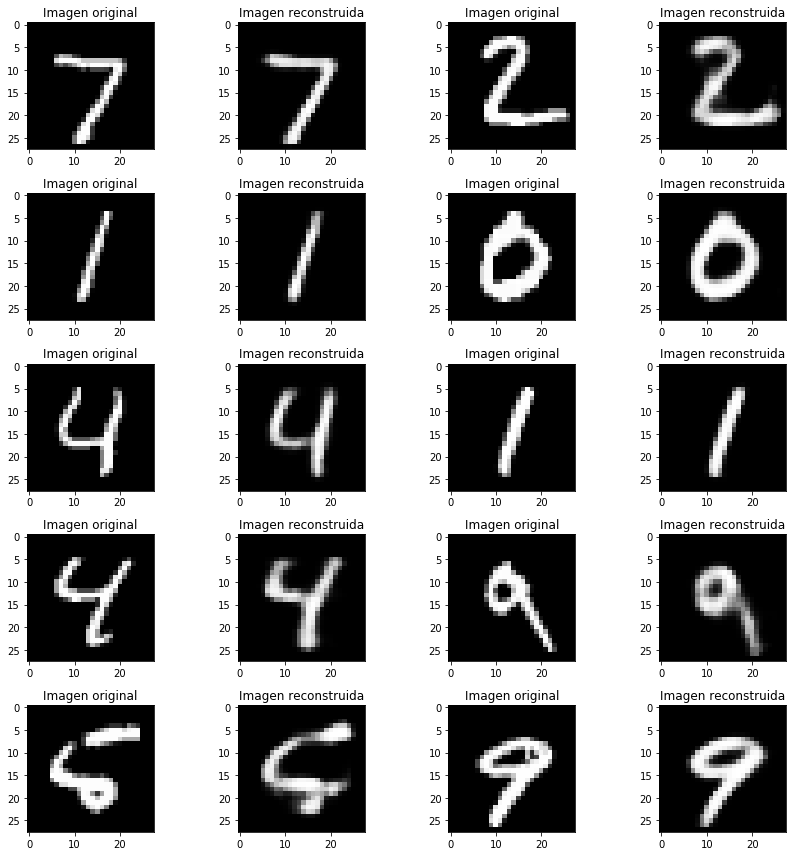

In [0]:
nombre='my_autoencoder5_768x250x16.h5'
autoencoder = load_model(nombre)
output=autoencoder.predict(x_test[0:10])

fig=plt.figure(figsize=(12,12))
rows=5
columns=4
j=0
for i in range(1,columns*rows+1):
    fig.add_subplot(rows,columns,i)
    if(i%2==1):
        plt.title('Imagen original')
        plt.imshow(x_test[j].reshape((28,28)),cmap='gray')
    elif(i%2==0):
        plt.title('Imagen reconstruida')
        plt.imshow(output[j].reshape((28,28)),cmap='gray')
        j+=1
plt.tight_layout()
plt.show()

Parte e)

In [0]:
from sklearn.manifold import TSNE

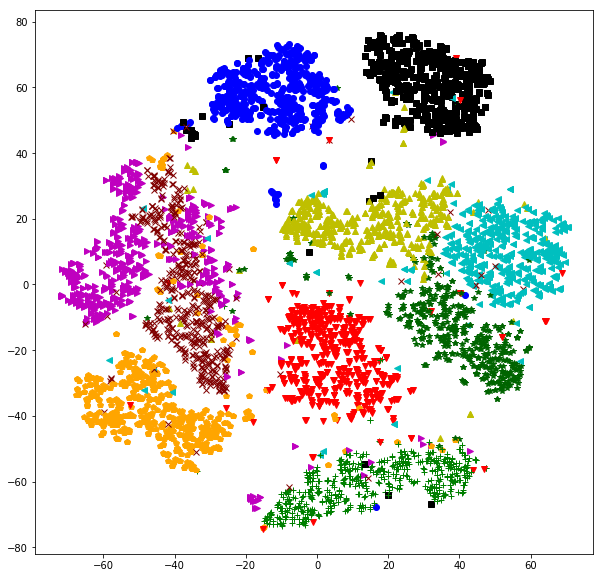

In [0]:
nombre='my_autoencoder4_768x1000x500x250x16.h5'
autoencoder = load_model(nombre)
nplot=5000 #warning: mind your memory!
encoded_train = autoencoder.predict(x_train[:nplot])
model = TSNE(n_components=2, random_state=0)
encoded_train = model.fit_transform(encoded_train)
plt.figure(figsize=(10, 10))
colors={0:'b',1:'g',2:'r',3:'c',4:'m',5:'y',6:'k',7:'orange',8:'darkgreen',9:'maroon'}
markers={0:'o',1:'+',2: 'v',3:'<',4:'>',5:'^',6:'s',7:'p',8:'*',9:'x'}
for idx in range(0,nplot):
    label = y_train[idx]
    line = plt.plot(encoded_train[idx][0], encoded_train[idx][1],
        color=colors[label], marker=markers[label], markersize=6)


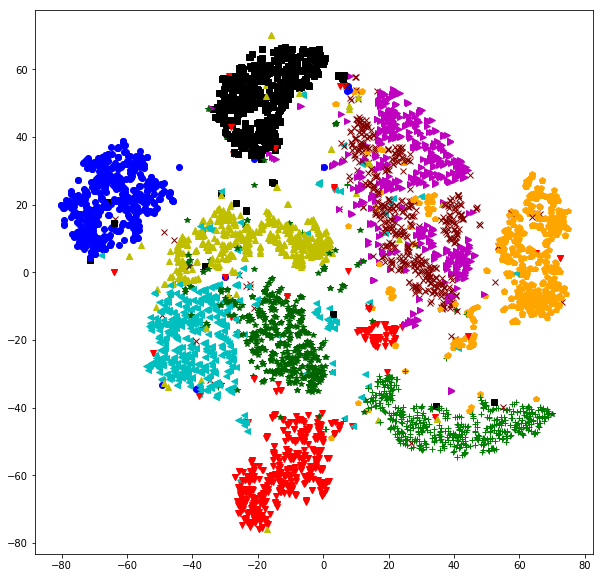

In [0]:
pca = PCA(n_components=16)
pca.fit(x_train)
pca_train = pca.transform(x_train)
encoded_train = pca_train[:nplot]
model = TSNE(n_components=2, random_state=0)
encoded_train = model.fit_transform(encoded_train)
plt.figure(figsize=(10, 10))
colors={0:'b',1:'g',2:'r',3:'c',4:'m',5:'y',6:'k',7:'orange',8:'darkgreen',9:'maroon'}
markers={0:'o',1:'+',2: 'v',3:'<',4:'>',5:'^',6:'s',7:'p',8:'*',9:'x'}
for idx in range(0,nplot):
    label = y_train[idx]
    line = plt.plot(encoded_train[idx][0], encoded_train[idx][1],
        color=colors[label], marker=markers[label], markersize=6)

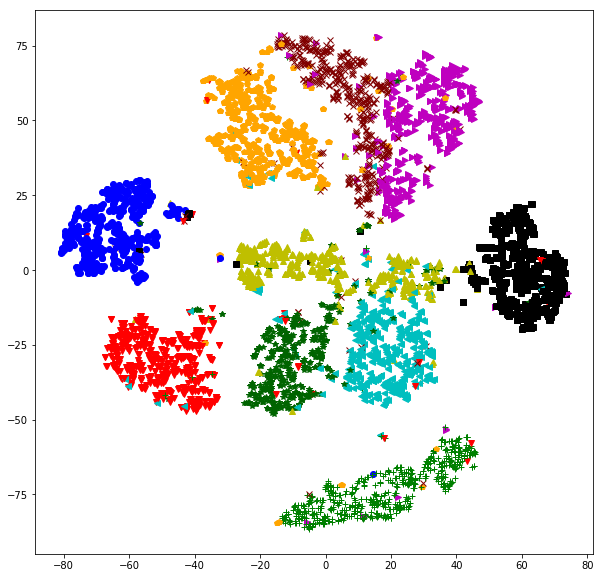

In [0]:
nombre='my_autoencoder4_768x1000x500x250x4.h5'
autoencoder = load_model(nombre)
nplot=5000 #warning: mind your memory!
encoded_train = autoencoder.predict(x_train[:nplot])
model = TSNE(n_components=2, random_state=0)
encoded_train = model.fit_transform(encoded_train)
plt.figure(figsize=(10, 10))
colors={0:'b',1:'g',2:'r',3:'c',4:'m',5:'y',6:'k',7:'orange',8:'darkgreen',9:'maroon'}
markers={0:'o',1:'+',2: 'v',3:'<',4:'>',5:'^',6:'s',7:'p',8:'*',9:'x'}
for idx in range(0,nplot):
    label = y_train[idx]
    line = plt.plot(encoded_train[idx][0], encoded_train[idx][1],
        color=colors[label], marker=markers[label], markersize=6)


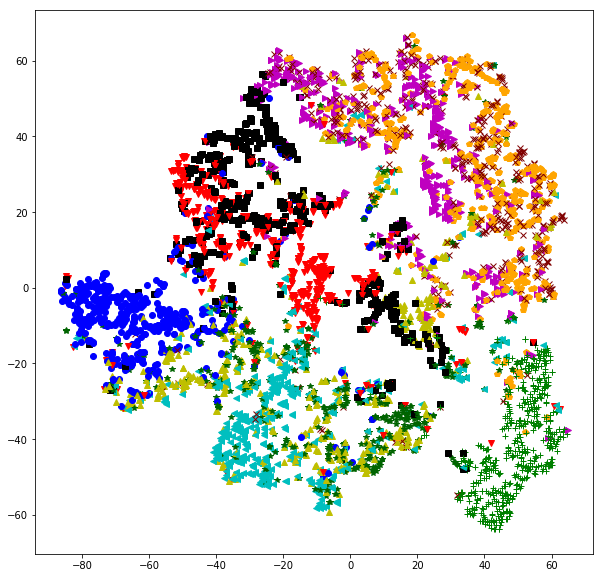

In [0]:
pca = PCA(n_components=4)
pca.fit(x_train)
pca_train = pca.transform(x_train)
encoded_train = pca_train[:nplot]
model = TSNE(n_components=2, random_state=0)
encoded_train = model.fit_transform(encoded_train)
plt.figure(figsize=(10, 10))
colors={0:'b',1:'g',2:'r',3:'c',4:'m',5:'y',6:'k',7:'orange',8:'darkgreen',9:'maroon'}
markers={0:'o',1:'+',2: 'v',3:'<',4:'>',5:'^',6:'s',7:'p',8:'*',9:'x'}
for idx in range(0,nplot):
    label = y_train[idx]
    line = plt.plot(encoded_train[idx][0], encoded_train[idx][1],
        color=colors[label], marker=markers[label], markersize=6)

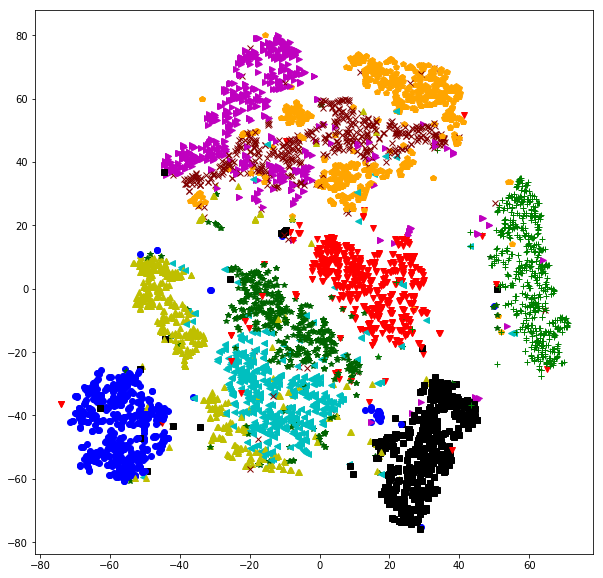

In [0]:
nombre='my_autoencoder4_768x250x8.h5'
autoencoder = load_model(nombre)
nplot=5000 #warning: mind your memory!
encoded_train = autoencoder.predict(x_train[:nplot])
model = TSNE(n_components=2, random_state=0)
encoded_train = model.fit_transform(encoded_train)
plt.figure(figsize=(10, 10))
colors={0:'b',1:'g',2:'r',3:'c',4:'m',5:'y',6:'k',7:'orange',8:'darkgreen',9:'maroon'}
markers={0:'o',1:'+',2: 'v',3:'<',4:'>',5:'^',6:'s',7:'p',8:'*',9:'x'}
for idx in range(0,nplot):
    label = y_train[idx]
    line = plt.plot(encoded_train[idx][0], encoded_train[idx][1],
        color=colors[label], marker=markers[label], markersize=6)


Parte f)

In [0]:
from keras.layers import Conv2D, MaxPooling2D, UpSampling2D

In [0]:
(x_train,_),(x_test,_)=mnist.load_data()
x_train=x_train.astype('float32')/255
x_test=x_test.astype('float32')/255
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1)) #modify for th dim ordering
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))

In [0]:
input_img = Input(shape=(28, 28, 1))
x = Conv2D(16, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), border_mode='same')(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2, 2))(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(16, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)
autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy',metrics=['accuracy'])
autoencoder.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_10 (InputLayer)        (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_34 (Conv2D)           (None, 28, 28, 16)        160       
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_35 (Conv2D)           (None, 14, 14, 8)         1160      
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 7, 7, 8)           0         
_________________________________________________________________
conv2d_36 (Conv2D)           (None, 7, 7, 8)           584       
_________________________________________________________________
up_sampling2d_14 (UpSampling (None, 14, 14, 8)         0         
__________

/home/difroggy/anaconda3/envs/redesneuronales/lib/python3.6/site-packages/ipykernel_launcher.py:3: UserWarning: Update your `MaxPooling2D` call to the Keras 2 API: `MaxPooling2D((2, 2), padding="same")`
  This is separate from the ipykernel package so we can avoid doing imports until


In [0]:
start = timer()
history=autoencoder.fit(x_train,x_train,epochs=40,batch_size=128,validation_split=val_percent,verbose=0)
end = timer()
print("Tiempo de ejecución: {} seg".format(end - start))
autoencoder.save('conv_autoencoder.h5')

Tiempo de ejecución: 3691.244961237002 seg


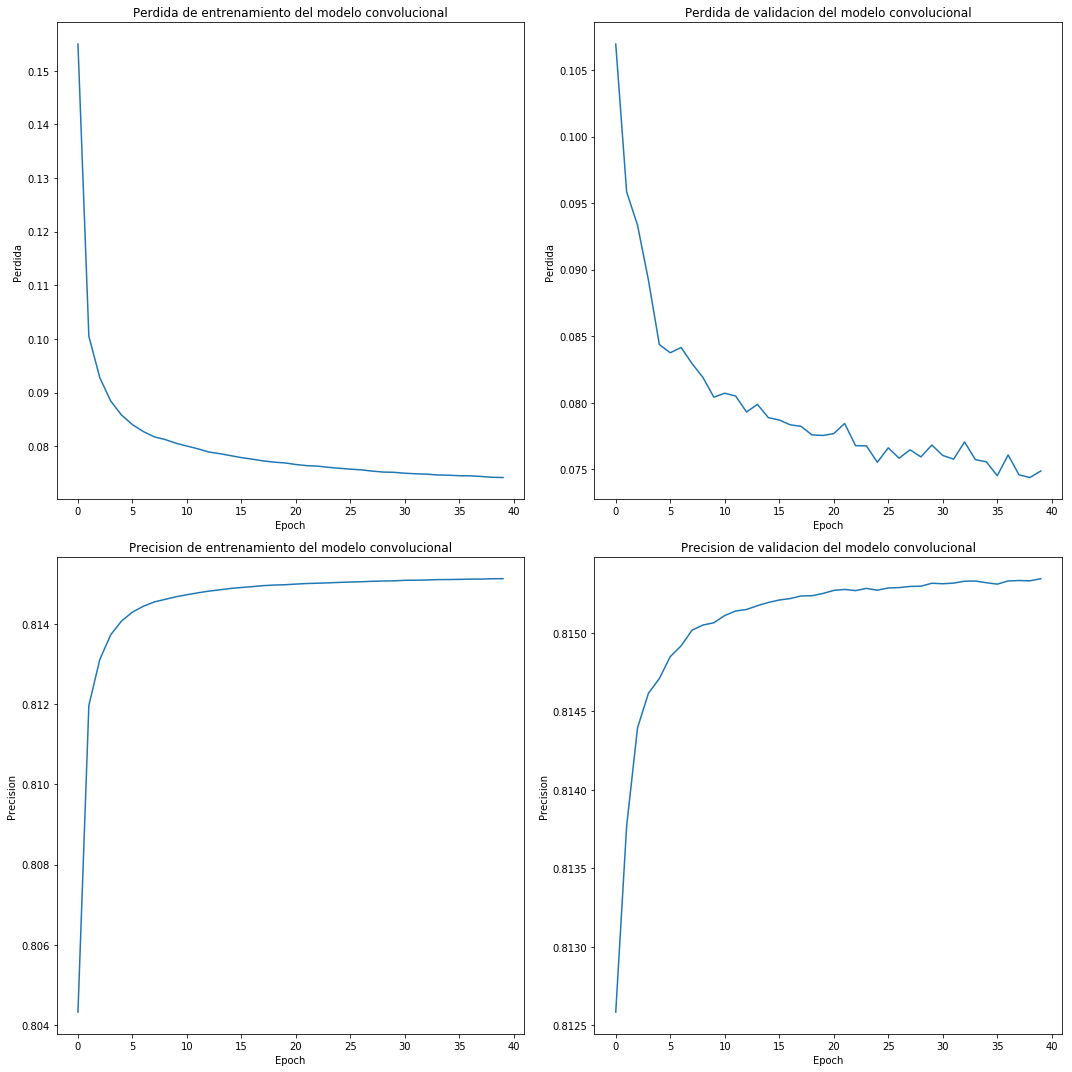

In [0]:
fig, axes = plt.subplots(nrows=2, ncols=2,figsize=(15,15))
ax = axes.flatten()
ax[0].plot(history.history['loss'])
ax[1].plot(history.history['val_loss'])
ax[2].plot(history.history['acc'])
ax[3].plot(history.history['val_acc'])
ax[0].set_title('Perdida de entrenamiento del modelo convolucional')
ax[0].set_ylabel('Perdida')
ax[0].set_xlabel('Epoch')
ax[1].set_title('Perdida de validacion del modelo convolucional')
ax[1].set_ylabel('Perdida')
ax[1].set_xlabel('Epoch')
ax[2].set_title('Precision de entrenamiento del modelo convolucional')
ax[2].set_ylabel('Precision')
ax[2].set_xlabel('Epoch')
ax[3].set_title('Precision de validacion del modelo convolucional')
ax[3].set_ylabel('Precision')
ax[3].set_xlabel('Epoch')
plt.tight_layout()
plt.show()

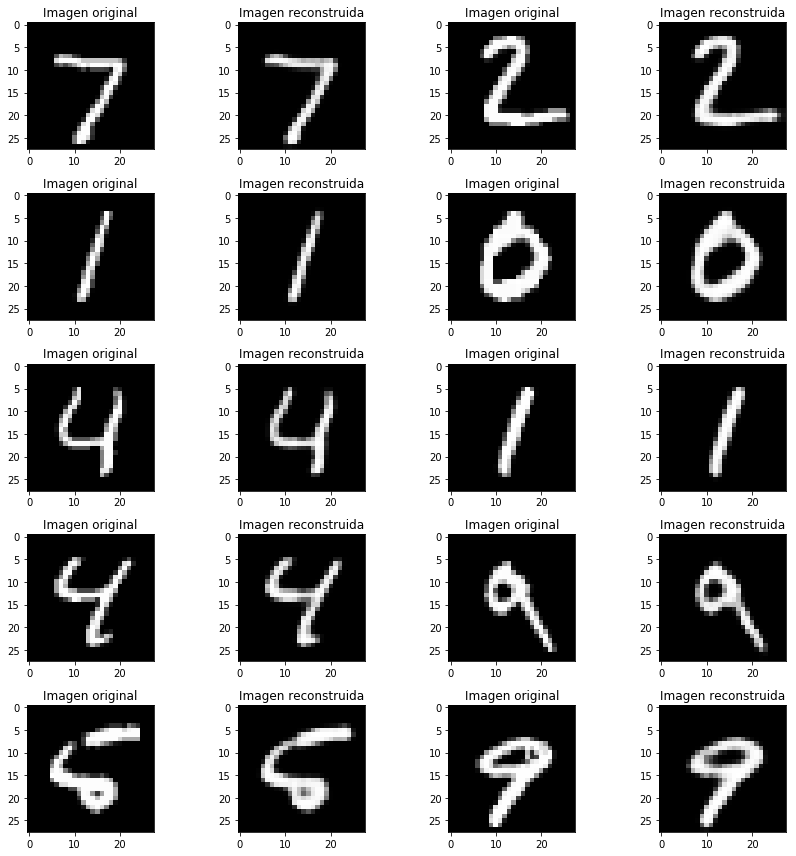

In [0]:
nombre='conv_autoencoder.h5'
autoencoder = load_model(nombre)
output=autoencoder.predict(x_test[0:10])
fig=plt.figure(figsize=(12,12))
rows=5
columns=4
j=0
for i in range(1,columns*rows+1):
    fig.add_subplot(rows,columns,i)
    if(i%2==1):
        plt.title('Imagen original')
        plt.imshow(x_test[j].reshape((28,28)),cmap='gray')
    elif(i%2==0):
        plt.title('Imagen reconstruida')
        plt.imshow(output[j].reshape((28,28)),cmap='gray')
        j+=1
plt.tight_layout()
plt.show()

In [0]:
input_img = Input(shape=(28, 28, 1))
x = Conv2D(16, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), border_mode='same')(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2, 2))(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(16, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)
autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer=Adam(), loss='binary_crossentropy',metrics=['accuracy'])

/home/difroggy/anaconda3/envs/redesneuronales/lib/python3.6/site-packages/ipykernel_launcher.py:3: UserWarning: Update your `MaxPooling2D` call to the Keras 2 API: `MaxPooling2D((2, 2), padding="same")`
  This is separate from the ipykernel package so we can avoid doing imports until


In [0]:
start = timer()
history2=autoencoder.fit(x_train,x_train,epochs=40,batch_size=128,validation_split=val_percent,verbose=0)
end = timer()
print("Tiempo de ejecución: {} seg".format(end - start))
autoencoder.save('conv_autoencoder2.h5')

Tiempo de ejecución: 205.86490165500072 seg


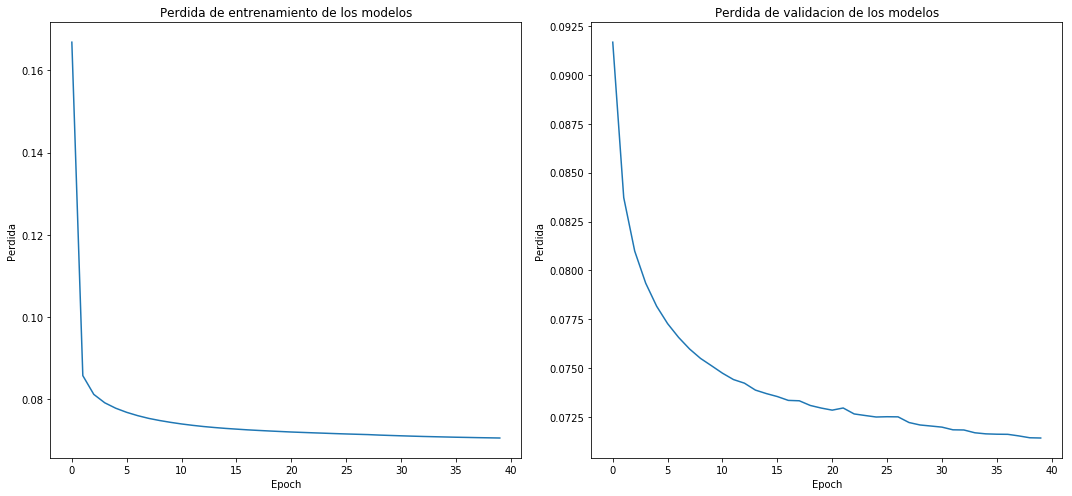

In [0]:
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(15,7))
ax = axes.flatten()
ax[0].plot(history2.history['loss'])
ax[1].plot(history2.history['val_loss'])
ax[0].set_title('Perdida de entrenamiento de los modelos')
ax[0].set_ylabel('Perdida')
ax[0].set_xlabel('Epoch')
ax[1].set_title('Perdida de validacion de los modelos')
ax[1].set_ylabel('Perdida')
ax[1].set_xlabel('Epoch')
plt.tight_layout()
plt.show()


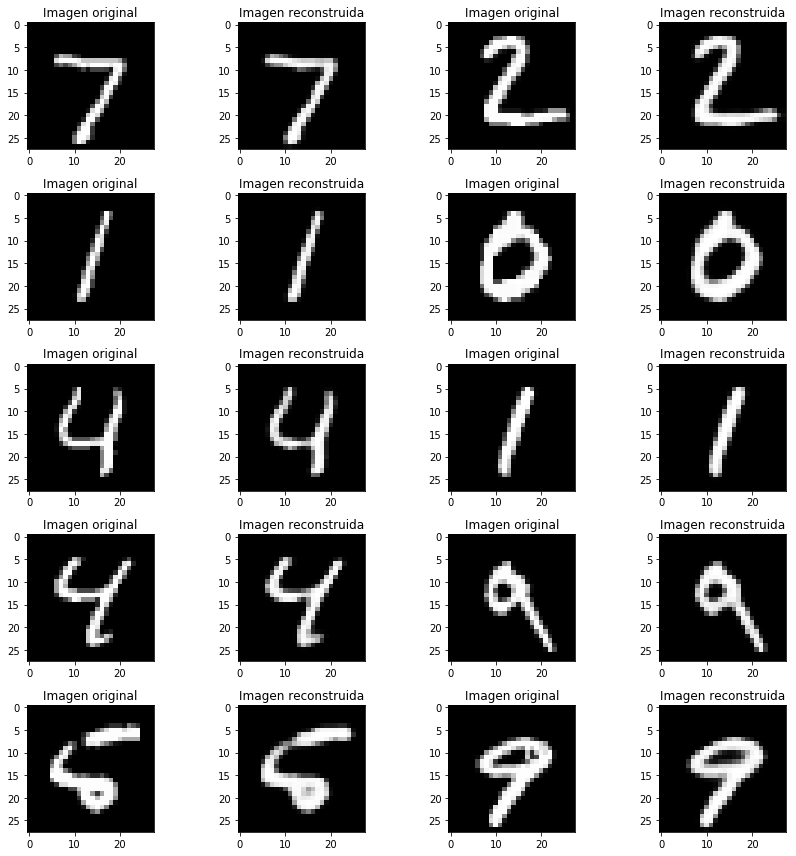

In [0]:
nombre='conv_autoencoder2.h5'
autoencoder = load_model(nombre)
output=autoencoder.predict(x_test[0:10])
fig=plt.figure(figsize=(12,12))
rows=5
columns=4
j=0
for i in range(1,columns*rows+1):
    fig.add_subplot(rows,columns,i)
    if(i%2==1):
        plt.title('Imagen original')
        plt.imshow(x_test[j].reshape((28,28)),cmap='gray')
    elif(i%2==0):
        plt.title('Imagen reconstruida')
        plt.imshow(output[j].reshape((28,28)),cmap='gray')
        j+=1
plt.tight_layout()
plt.show()

**Pregunta 3.2**

Parte a)

In [0]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.astype('float32') / 255. #and x_test
x_test = x_test.astype('float32') / 255. #and x_test
Y_train = to_categorical(y_train, 10)
Y_test = to_categorical(y_test, 10)
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

In [0]:
from numpy.random import binomial
noise_level = 1
noise_mask = binomial(n=1,p=noise_level,size=x_train.shape)
noisy_x_train = x_train*noise_mask
noise_mask = binomial(n=1,p=noise_level,size=x_test.shape)
noisy_x_test = x_test*noise_mask

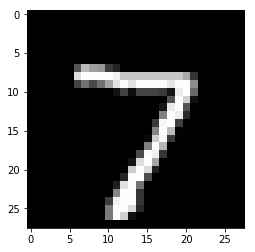

In [0]:
plt.imshow(noisy_x_test[0].reshape((28,28)),cmap='gray')
plt.show()

In [0]:
noise_level = 0
noise_mask = binomial(n=1,p=noise_level,size=x_train.shape)
noisy_x_train2 = x_train*noise_mask
noise_mask = binomial(n=1,p=noise_level,size=x_test.shape)
noisy_x_test2 = x_test*noise_mask

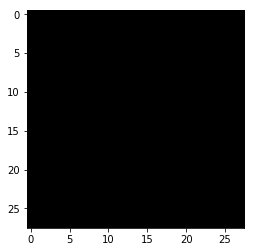

In [0]:
plt.imshow(noisy_x_test2[0].reshape((28,28)),cmap='gray')
plt.show()

In [0]:
pes=[.1,.3,.5,.7,.9]
i=0
for noise_level in pes:
    noise_mask = binomial(n=1,p=noise_level,size=x_train.shape)
    noisy_x_train = x_train*noise_mask
    noise_mask = binomial(n=1,p=noise_level,size=x_test.shape)
    noisy_x_test = x_test*noise_mask
    target_dim = 16 #try other and do a nice plot
    input_img = Input(shape=(784,))
    encoded1 = Dense(1000, activation='relu')(input_img)
    encoded2 = Dense(500, activation='relu')(encoded1)
    encoded3 = Dense(250, activation='relu')(encoded2)
    encoded4 = Dense(target_dim, activation='relu')(encoded3)
    decoded4 = Dense(250, activation='relu')(encoded4)
    decoded3 = Dense(500, activation='relu')(decoded4)
    decoded2 = Dense(1000, activation='relu')(decoded3)
    encoder = Model(input=input_img, output=encoded3)
    decoded1 = Dense(784, activation='sigmoid')(decoded2)
    autoencoder = Model(input=input_img, output=decoded1)
    autoencoder.compile(optimizer=Adam(), loss='mean_squared_error')
    start = timer()
    history=autoencoder.fit(noisy_x_train,x_train,epochs=40,batch_size=128,validation_split=val_percent,verbose=0)
    end = timer()
    nombre='denoiser'+str(i)+'_1000x500x250x16.h5'
    autoencoder.save(nombre)
    print("Tiempo de ejecución para p={}: {} seg".format(noise_level,end - start))
    i+=1

/home/difroggy/anaconda3/envs/redesneuronales/lib/python3.6/site-packages/ipykernel_launcher.py:17: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("de...)`
/home/difroggy/anaconda3/envs/redesneuronales/lib/python3.6/site-packages/ipykernel_launcher.py:19: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("de...)`


Tiempo de ejecución para p=0.1: 204.994551666 seg
Tiempo de ejecución para p=0.3: 207.5657431290001 seg
Tiempo de ejecución para p=0.5: 208.36696157500046 seg
Tiempo de ejecución para p=0.7: 203.98690452400024 seg
Tiempo de ejecución para p=0.9: 204.10153121999974 seg


In [0]:
def comparacionNoise(i):
    pes=[.1,.3,.5,.7,.9]
    noise_level=pes[i]
    noise_mask = binomial(n=1,p=noise_level,size=x_test.shape)
    noisy_x_test = x_test*noise_mask
    nombre='denoiser'+str(i)+'_1000x500x250x16.h5'
    autoencoder = load_model(nombre)
    output=autoencoder.predict(noisy_x_test)
    fig=plt.figure(figsize=(12,12))
    rows=5
    columns=6
    j=0
    for i in range(1,columns*rows+1):
        fig.add_subplot(rows,columns,i)
        if(i%3==1):
            plt.title('Imagen original')
            plt.imshow(x_test[j].reshape((28,28)),cmap='gray')
        elif(i%3==2):
            plt.title('Imagen con ruido')
            plt.imshow(noisy_x_test[j].reshape((28,28)),cmap='gray')
        elif(i%3==0):
            plt.title('Imagen reconstruida')
            plt.imshow(output[j].reshape((28,28)),cmap='gray')
            j+=1
    plt.tight_layout()
    plt.show()

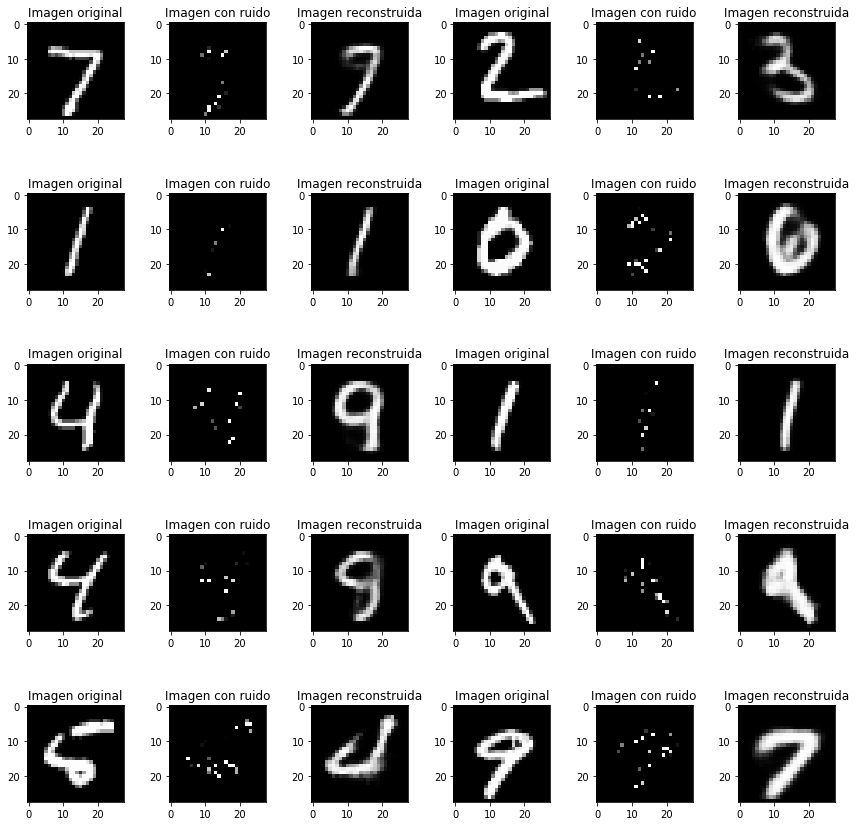

In [0]:
comparacionNoise(0)

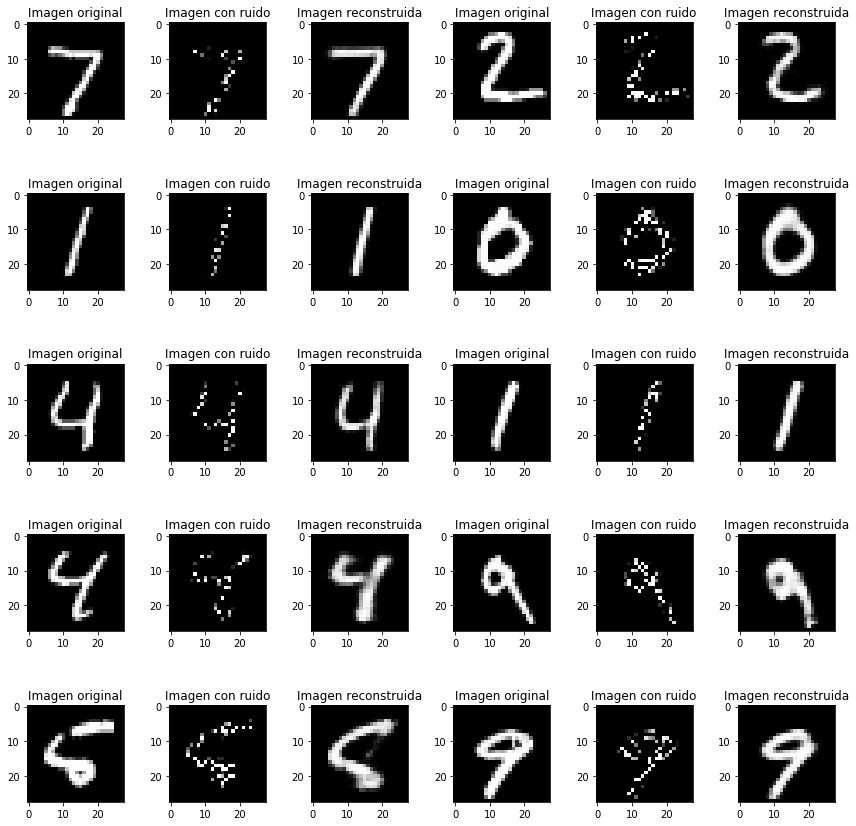

In [0]:
comparacionNoise(1)

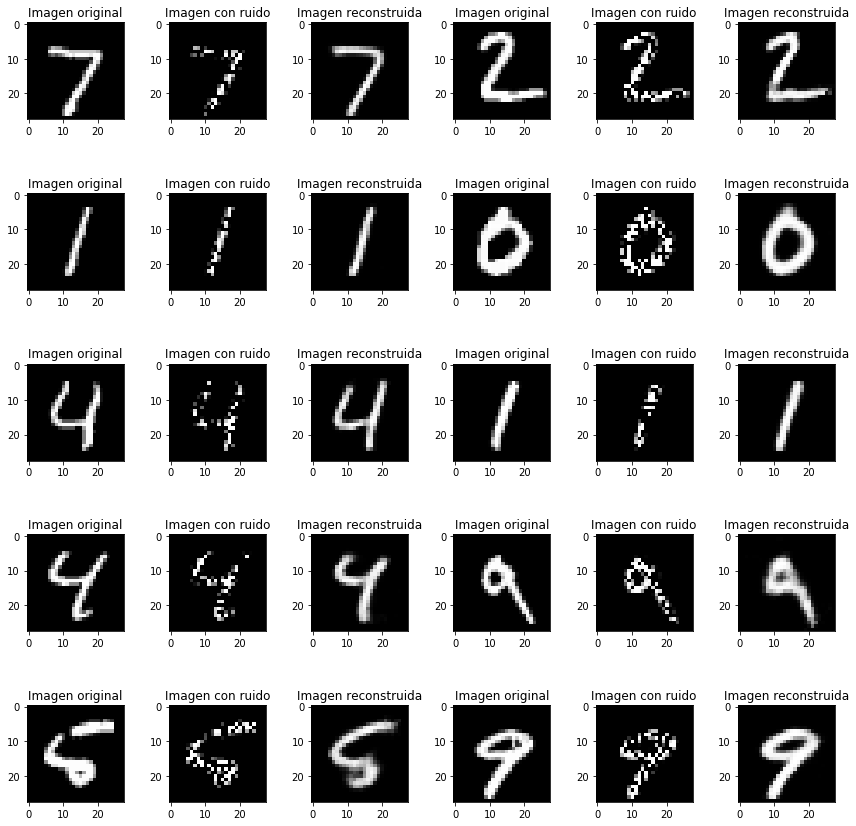

In [0]:
comparacionNoise(2)

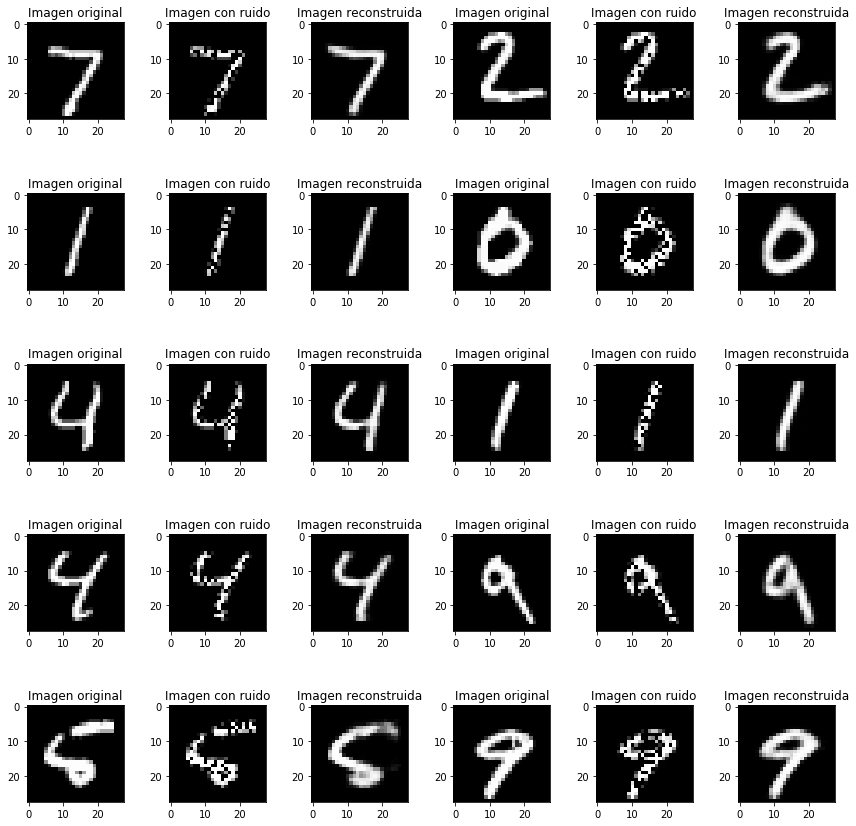

In [0]:
comparacionNoise(3)

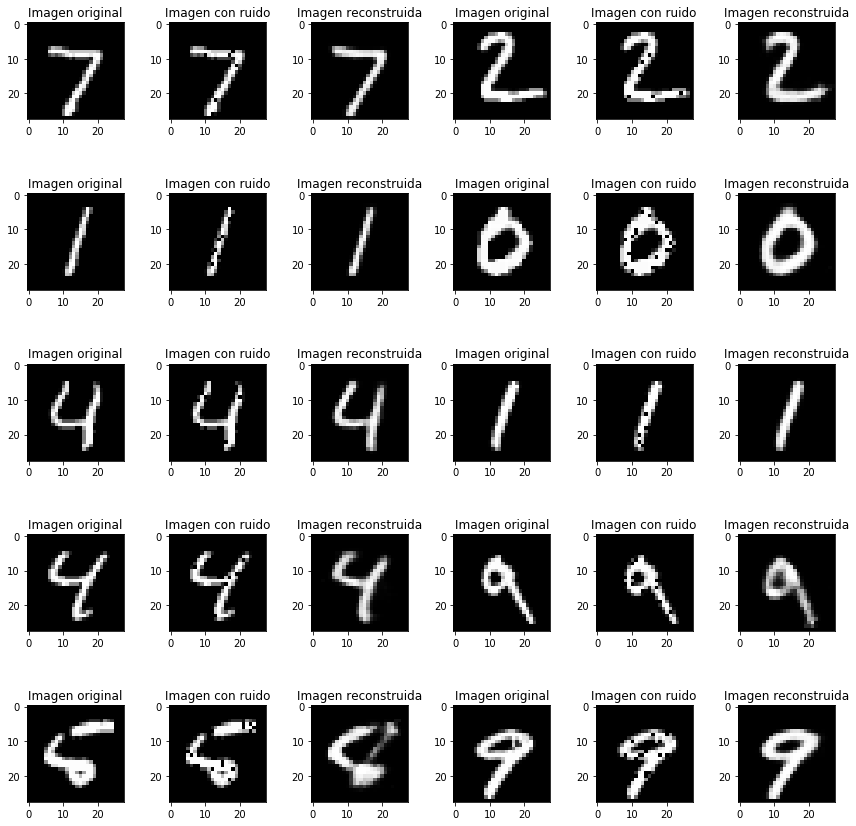

In [0]:
comparacionNoise(4)